In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Chrsm lengths

In [3]:
#l = pd.read_csv("lengths.csv", sep=';')
l = pd.read_csv("lengths2.csv", sep=';')

l['super_ghost_proportion'] = l['nb_super_ghosts']/l['pop_size']
l['fusion_rate'] = l['nb_fusions']/l['nb_segments']
l['coal_rate'] = l['nb_seg_coal']/l['nb_segments']
l['split_rate'] = l['nb_splits']/l['nb_segments']
l['coal_split'] = l['coal_rate']/l['split_rate']
l['seg_len'] = l['nb_bases']/l['nb_segments']
l['seg_density'] = l['nb_segments']/l['chrlen']
l['seg_frac'] = l['seg_len']/l['chrlen']
l = l[(l['pop_size']==10000) & (l['nbchr']==36)]
l

Unnamed: 0  backtime  nb_ind_genealogical_ancestors  \
0                 0         0                          10000   
1                 1         1                           8668   
2                 2         2                           8233   
3                 3         3                           8064   
4                 4         4                           8028   
...             ...       ...                            ...   
1499995       99995     99995                           7919   
1499996       99996     99996                           7932   
1499997       99997     99997                           7932   
1499998       99998     99998                           7963   
1499999       99999     99999                           7905   

         nb_ind_genetic_ancestors  nb_chr_genetic_ancestors  nb_segments  \
0                           10000                    720000       720000   
1                            8668                    580122       720675   
2                            8233                    512834       720583   
3                            8064                    470636       719172   
4                            8028                    442129       719572   
...                           ...                       ...          ...   
1499995                      7626                     86879       693075   
1499996                      7642                     86818       693068   
1499997                      7669                     86620       693055   
1499998                      7698                     86634       693077   
1499999                      7643                     86544       693057   

         nb_fusions  nb_seg_coal  nb_splits    nb_bases  ...     seed  \
0                 0            0          0  3600000000  ...   987321   
1             26920           45      32951  2276260846  ...   987321   
2             16092           67      21666  1688099861  ...   987321   
3             12313           85      25857  1346660223  ...   987321   
4             10148          106      18172  1123583313  ...   987321   
...             ...          ...        ...         ...  ...      ...   
1499995           3           23         36    18365182  ...  4334892   
1499996           4           34         31    18365169  ...  4334892   
1499997           4           45         36    18365137  ...  4334892   
1499998           1           17         40    18365124  ...  4334892   
1499999           5           50         35    18365081  ...  4334892   

         exact_ghosts  super_ghost_proportion  fusion_rate  coal_rate  \
0                   0                  0.0000     0.000000   0.000000   
1                   0                  0.0000     0.037354   0.000062   
2                   0                  0.0000     0.022332   0.000093   
3                   0                  0.0000     0.017121   0.000118   
4                   0                  0.0000     0.014103   0.000147   
...               ...                     ...          ...        ...   
1499995             0                  0.0293     0.000004   0.000033   
1499996             0                  0.0290     0.000006   0.000049   
1499997             0                  0.0263     0.000006   0.000065   
1499998             0                  0.0265     0.000001   0.000025   
1499999             0                  0.0262     0.000007   0.000072   

         split_rate  coal_split      seg_len  seg_density  seg_frac  
0          0.000000         NaN  5000.000000   144.000000  1.000000  
1          0.045722    0.001366  3158.512292   144.135000  0.631702  
2          0.030067    0.003092  2342.686215   144.116600  0.468537  
3          0.035954    0.003287  1872.514813   143.834400  0.374503  
4          0.025254    0.005833  1561.460581   143.914400  0.312292  
...             ...         ...          ...          ...       ...  
1499995    0.000052    0.638889    26.498116     1.386150  0.000053  
1499996    0.

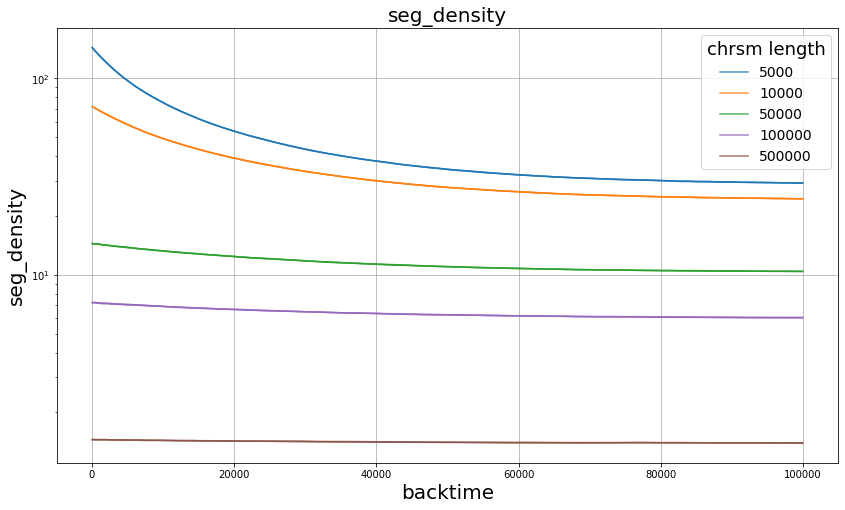

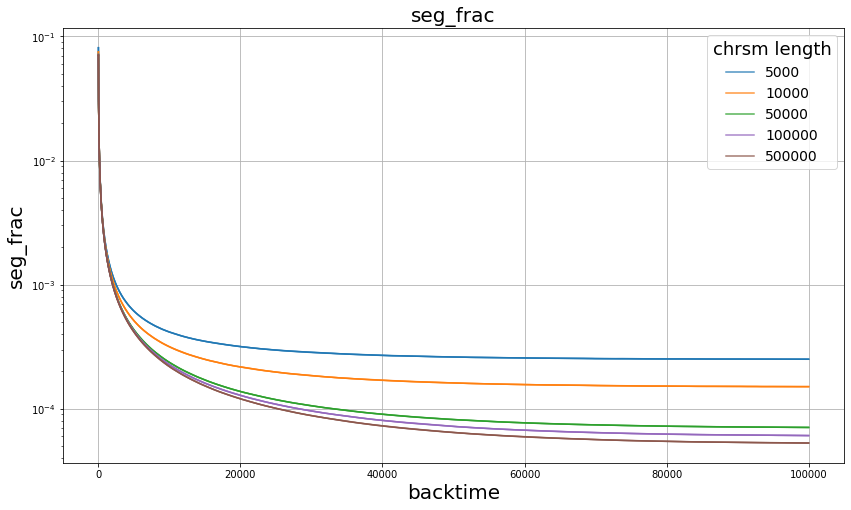

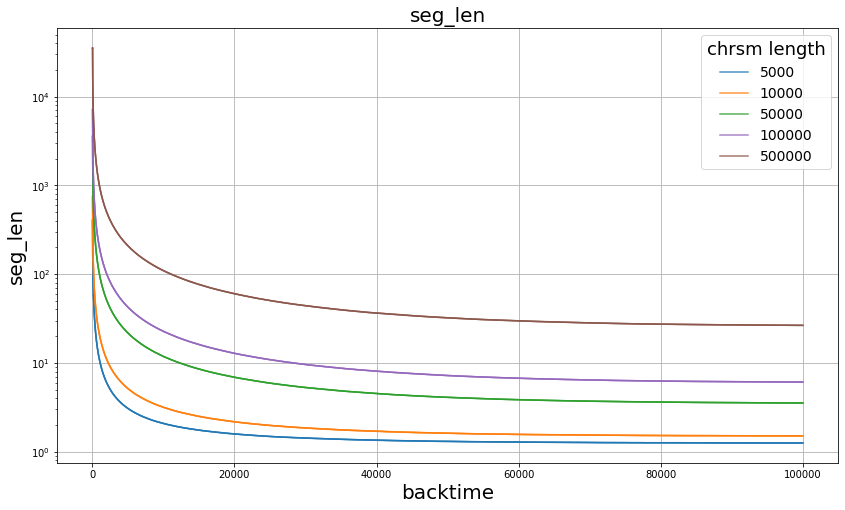

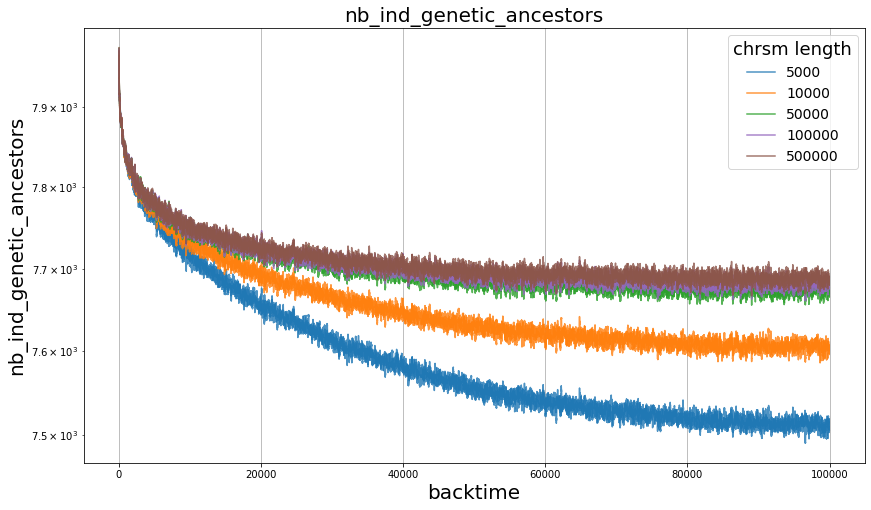

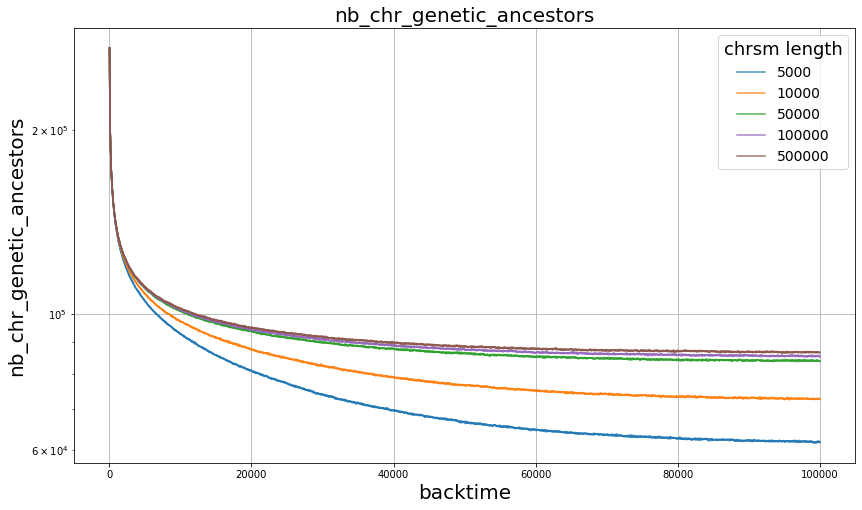

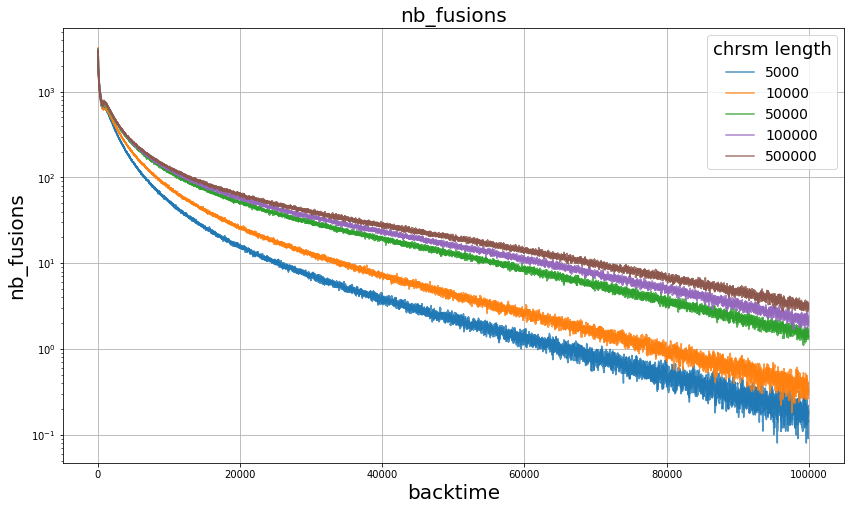

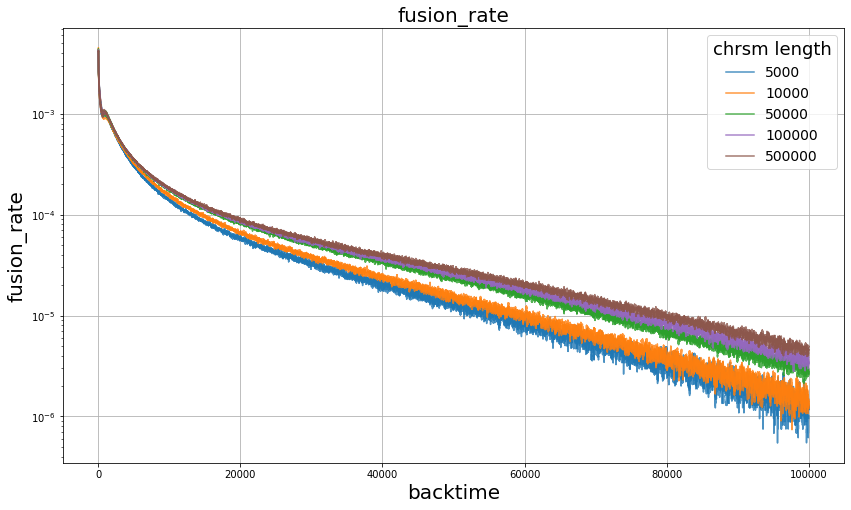

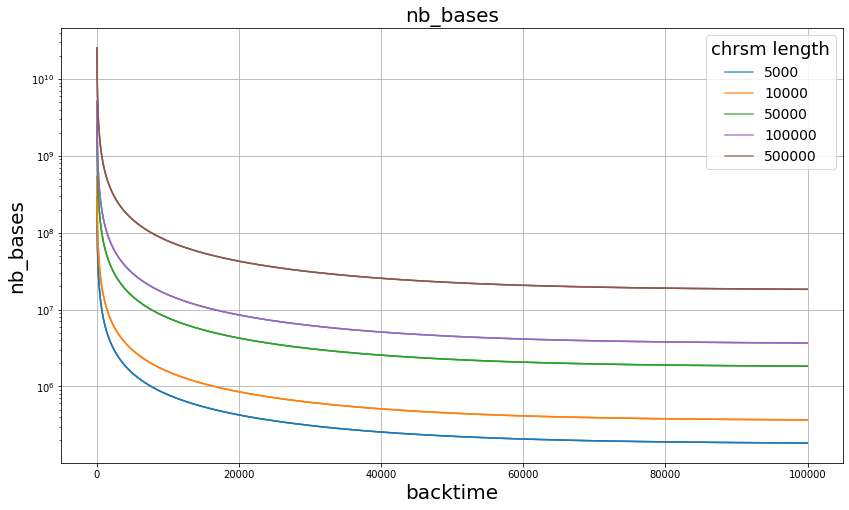

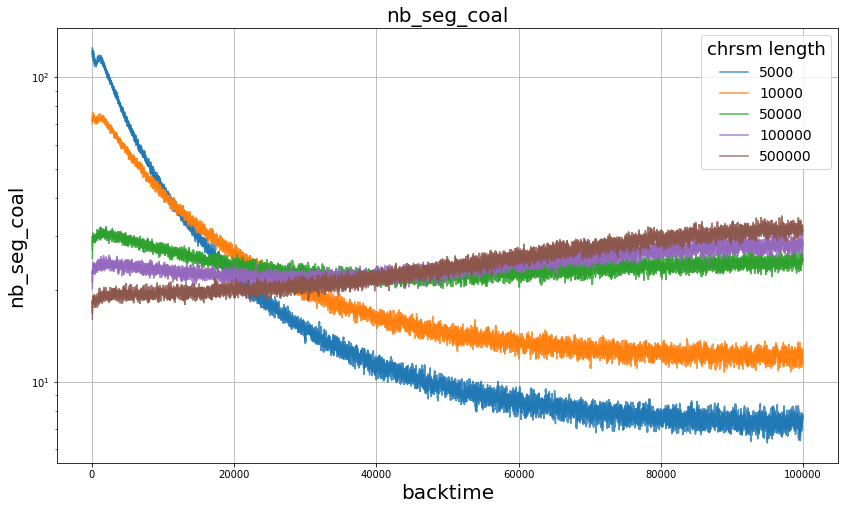

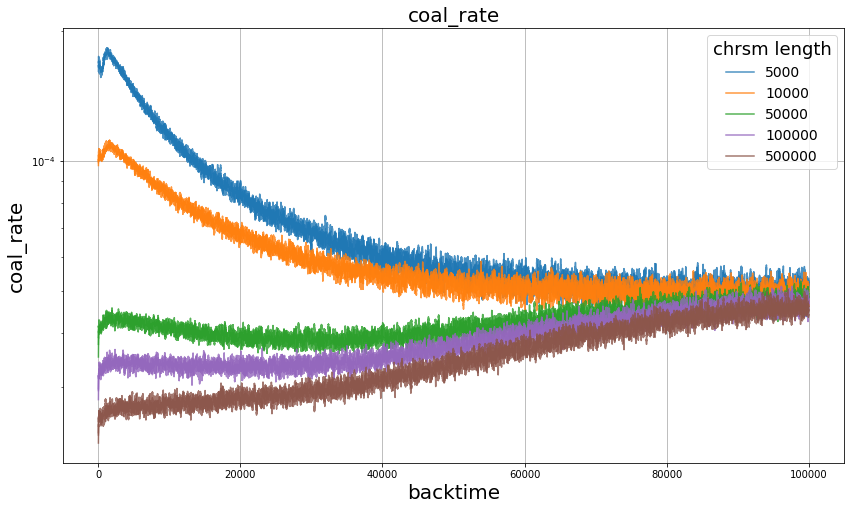

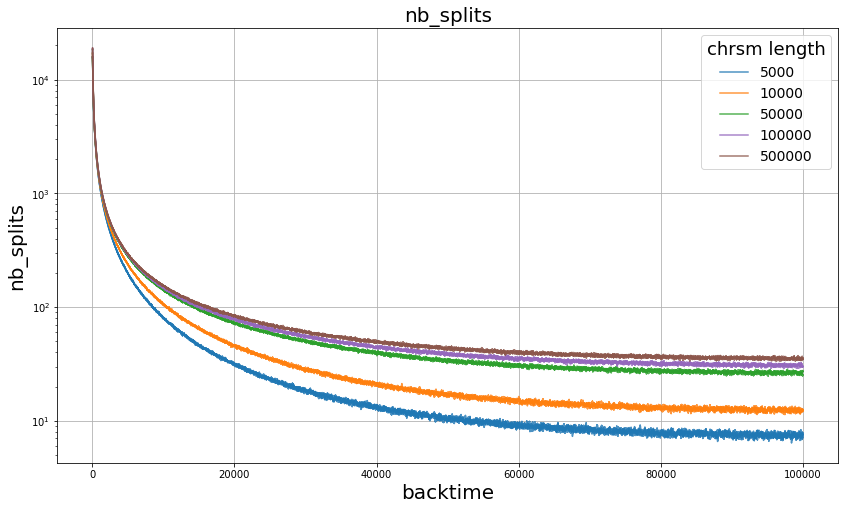

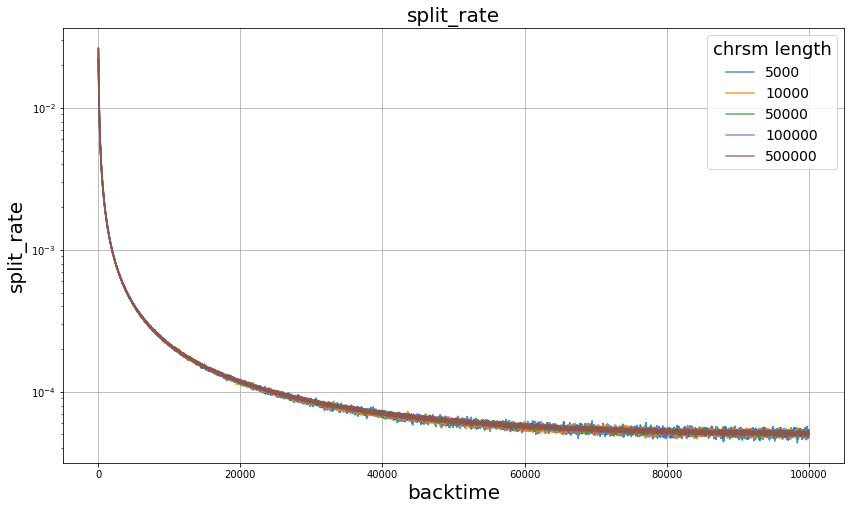

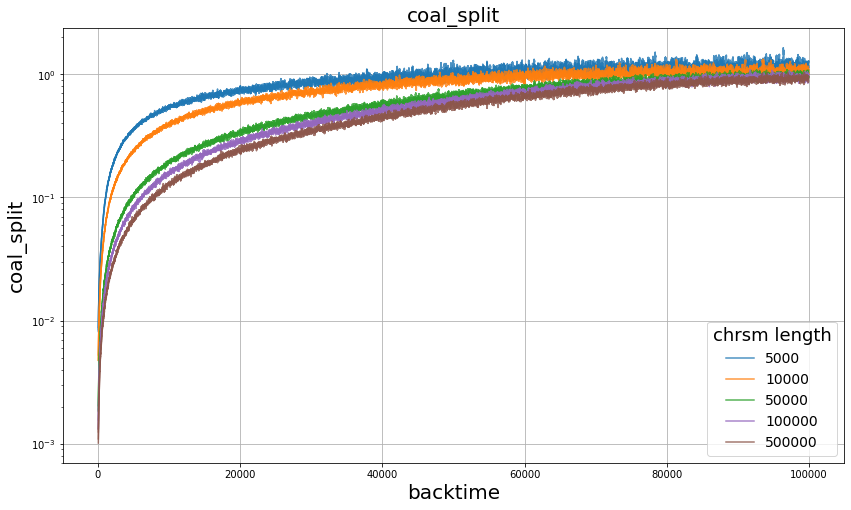

In [4]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:purple", "tab:brown"]

for prop in ["seg_density","seg_frac","seg_len","nb_ind_genetic_ancestors","nb_chr_genetic_ancestors",
            "nb_fusions", "fusion_rate", "nb_bases", "nb_seg_coal", "coal_rate", "nb_splits","split_rate", "coal_split"]:
    
    fig, ax = plt.subplots(figsize=(14,8))
    for i,length in enumerate(np.sort(l["chrlen"].unique())):
        for j,seed in enumerate(l["seed"].unique()):
            tmp = l[(l['chrlen'] == length) & (l['seed']==seed)]
            if j==0:
                label = str(length)
            else:
                label=None
            ax.plot(tmp['backtime'].rolling(window=100).mean(), tmp[prop].rolling(window=100).mean(),
                   c=colors[i], label=label,
                   alpha=.8)
    plt.legend(title="chrsm length", fontsize=14, title_fontsize=18)
    plt.xlabel("backtime", fontsize=20)
    plt.ylabel(prop, fontsize=20)
    plt.title(prop, fontsize=20)
    plt.grid()
    plt.yscale("log")
    #plt.xscale("log")
    plt.show()

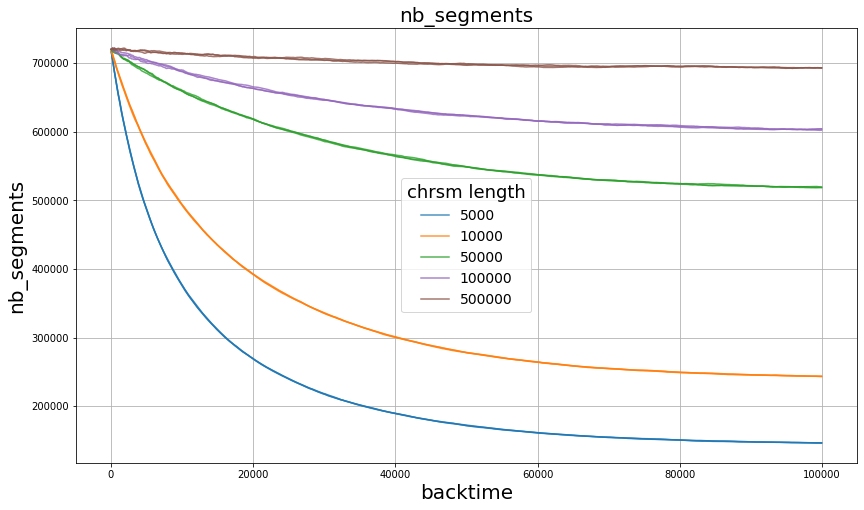

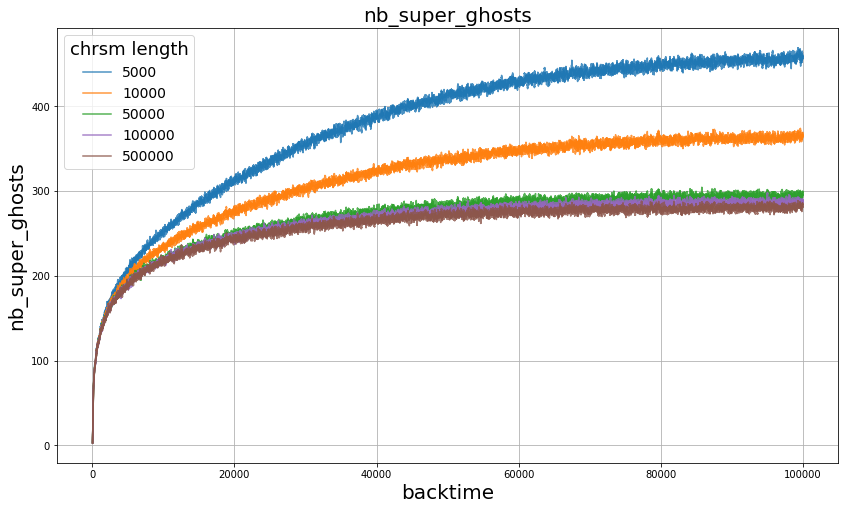

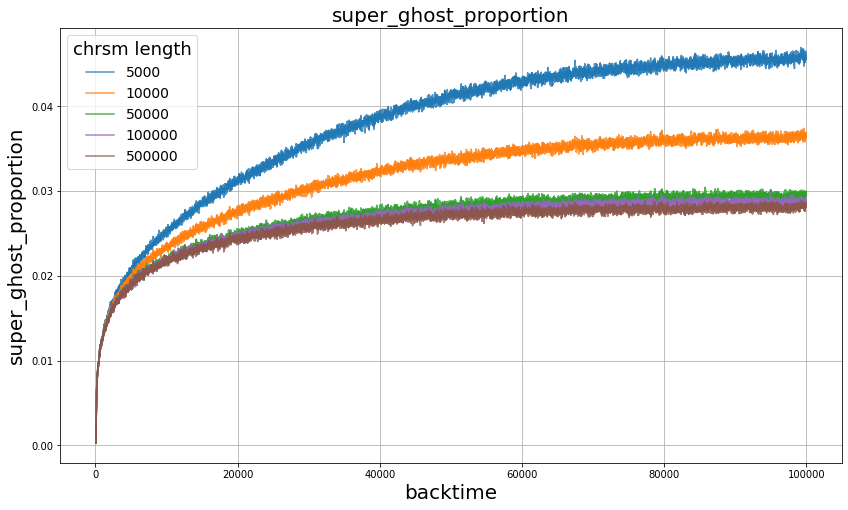

In [19]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:purple", "tab:brown"]

for prop in ["nb_segments", "nb_super_ghosts", "super_ghost_proportion"]:
    
    fig, ax = plt.subplots(figsize=(14,8))
    for i,length in enumerate(np.sort(l["chrlen"].unique())):
        for j,seed in enumerate(l["seed"].unique()):
            tmp = l[(l['chrlen'] == length) & (l['seed']==seed)]
            if j==0:
                label = str(length)
            else:
                label=None
            ax.plot(tmp['backtime'].rolling(100).mean(), tmp[prop].rolling(100).mean(),
                   c=colors[i], label=label,
                   alpha=.8)
    plt.legend(title="chrsm length", fontsize=14, title_fontsize=18)
    plt.xlabel("backtime", fontsize=20)
    plt.ylabel(prop, fontsize=20)
    plt.title(prop, fontsize=20)
    plt.grid()
    plt.show()

# Genome structure

In [15]:
nbch = pd.read_csv("nbchr2.csv", sep=';')
nbch['super_ghost_proportion'] = nbch['nb_super_ghosts']/nbch['pop_size']
nbch['fusion_rate'] = nbch['nb_fusions']/nbch['nb_segments']
nbch['comb_prop'] = nbch["nbchr"]+nbch["recomb_rate"]
nbch['chr_anc_density'] = nbch['nb_chr_genetic_ancestors']/nbch['nbchr']
nbch['coal_rate'] = nbch['nb_seg_coal']/nbch['nb_segments']
nbch['split_rate'] = nbch['nb_splits']/nbch['nb_segments']
nbch['coal_split'] = nbch['coal_rate']/nbch['split_rate']
nbch['seg_len'] = nbch['nb_bases']/nbch['nb_segments']
nbch = nbch[(nbch["pop_size"]==10000)]
nbch

Unnamed: 0  backtime  nb_ind_genealogical_ancestors  \
0                 0         0                          10000   
1                 1         1                           8658   
2                 2         2                           8179   
3                 3         3                           8034   
4                 4         4                           7985   
...             ...       ...                            ...   
1799995       99995     99995                           7919   
1799996       99996     99996                           7932   
1799997       99997     99997                           7932   
1799998       99998     99998                           7963   
1799999       99999     99999                           7905   

         nb_ind_genetic_ancestors  nb_chr_genetic_ancestors  nb_segments  \
0                           10000                     20000        20000   
1                            8658                     17316        86359   
2                            8179                     16356       114724   
3                            8034                     16047       131477   
4                            7977                     15893       143276   
...                           ...                       ...          ...   
1799995                      7009                     30824        81246   
1799996                      7014                     30811        81245   
1799997                      7034                     30875        81246   
1799998                      7025                     30832        81248   
1799999                      7002                     30809        81249   

         nb_fusions  nb_seg_coal  nb_splits    nb_bases  ...     seed  \
0                 0            0          0  2000000000  ...  1389743   
1            133529            4     199892  1263609437  ...  1389743   
2             98064           11     126440   932759112  ...  1389743   
3             76147           15      92915   746577057  ...  1389743   
4             63273           15      75087   623602116  ...  1389743   
...             ...          ...        ...         ...  ...      ...   
1799995           0            3          3      102040  ...  4334892   
1799996           0            6          5      102040  ...  4334892   
1799997           0            2          3      102040  ...  4334892   
1799998           0            5          7      102040  ...  4334892   
1799999           0            1          2      102040  ...  4334892   

         exact_ghosts  super_ghost_proportion  fusion_rate  comb_prop  \
0                   0                  0.0000     0.000000     1.0001   
1                   0                  0.0000     1.546208     1.0001   
2                   0                  0.0000     0.854782     1.0001   
3                   0                  0.0000     0.579166     1.0001   
4                   0                  0.0000     0.441616     1.0001   
...               ...                     ...          ...        ...   
1799995             0                  0.0910     0.000000    10.0002   
1799996             0                  0.0918     0.000000    10.0002   
1799997             0                  0.0898     0.000000    10.0002   
1799998             0                  0.0938     0.000000    10.0002   
1799999             0                  0.0903     0.000000    10.0002   

         chr_anc_density  coal_rate  split_rate  coal_split        seg_len  
0                20000.0   0.000000    0.000000         NaN  100000.000000  
1                17316.0   0.000046    2.314663    0.000020   14632.052675  
2                16356.0   0.000096    1.102123    0.000087    8130.461909  
3                16047.0   0.000114    0.706702    0.000161    5678.385246  
4                15893.0   0.000105    0.524072    0.000200    4352.453419  
...                  ...        ...         ...         ...            ...  
1799995           3082.4   0.00003

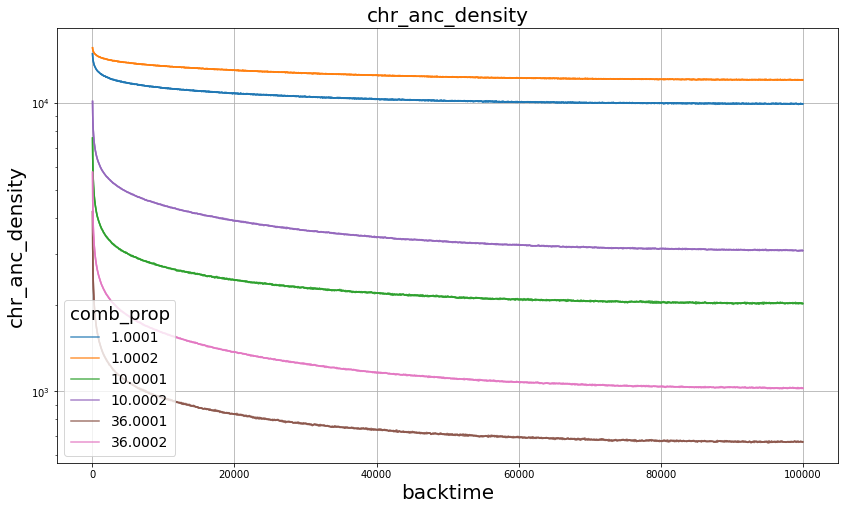

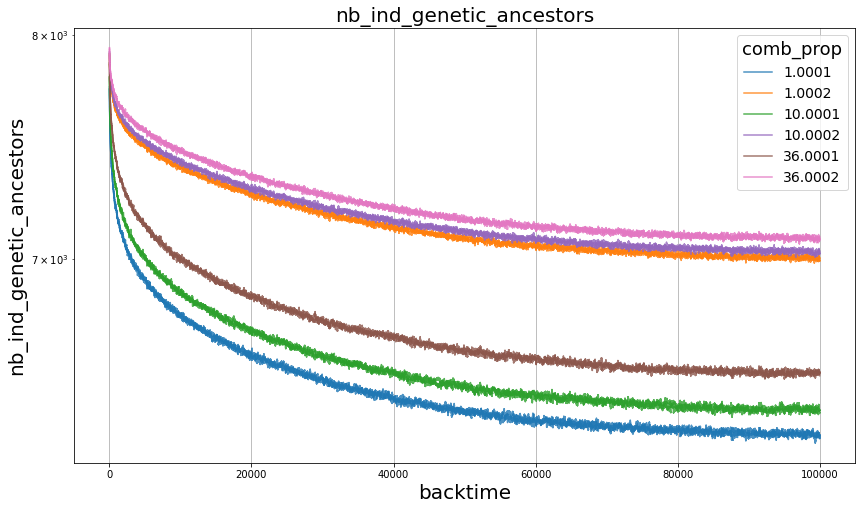

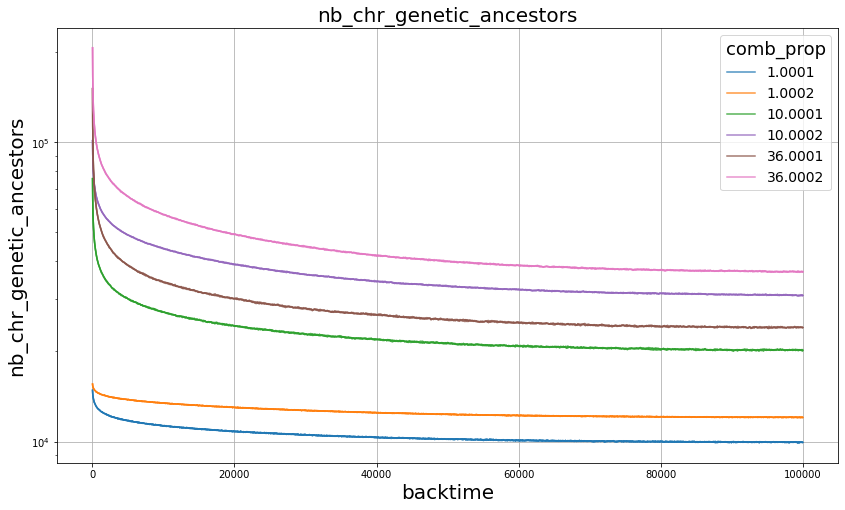

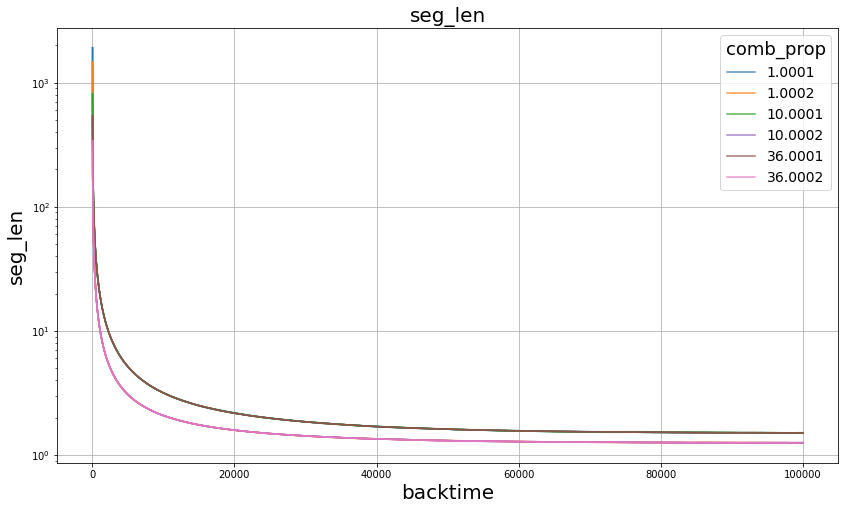

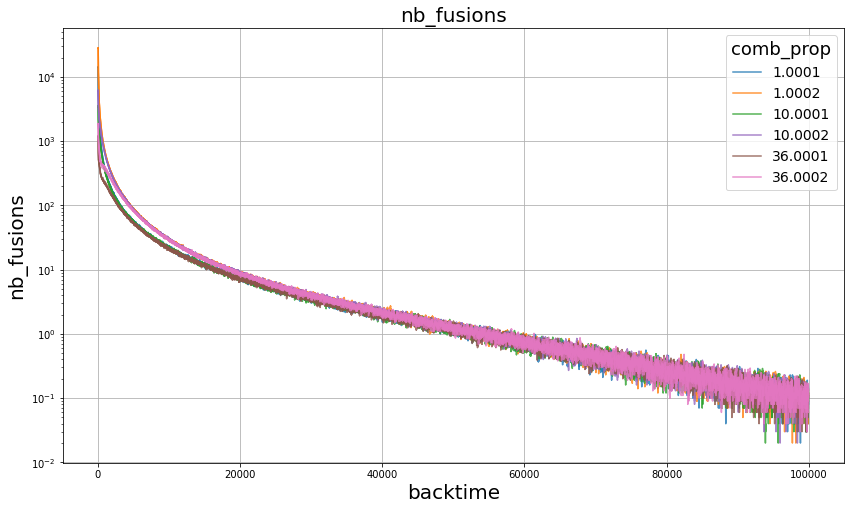

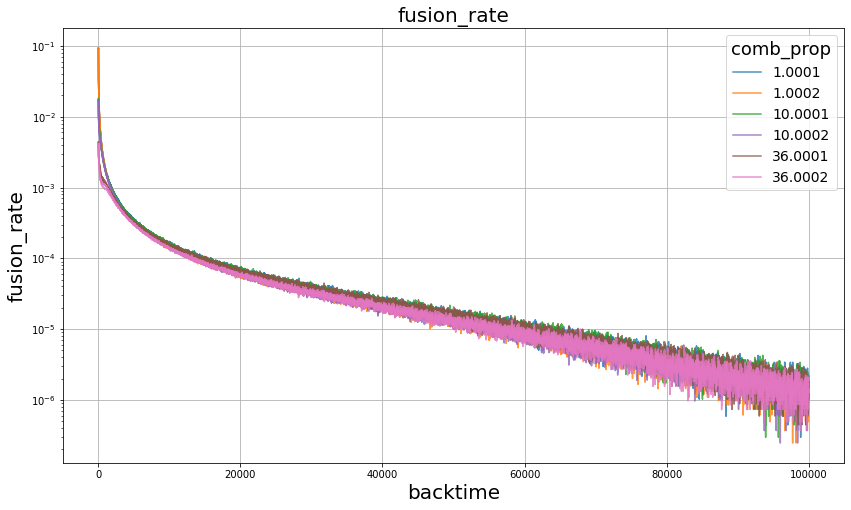

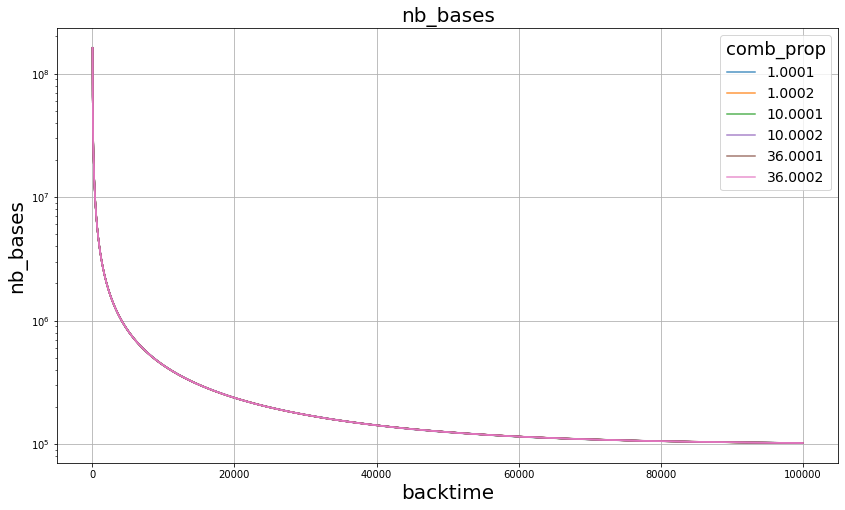

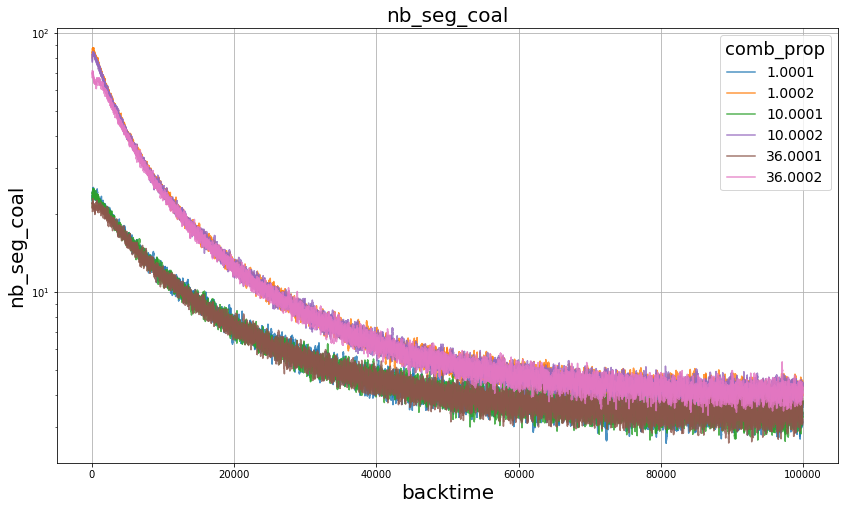

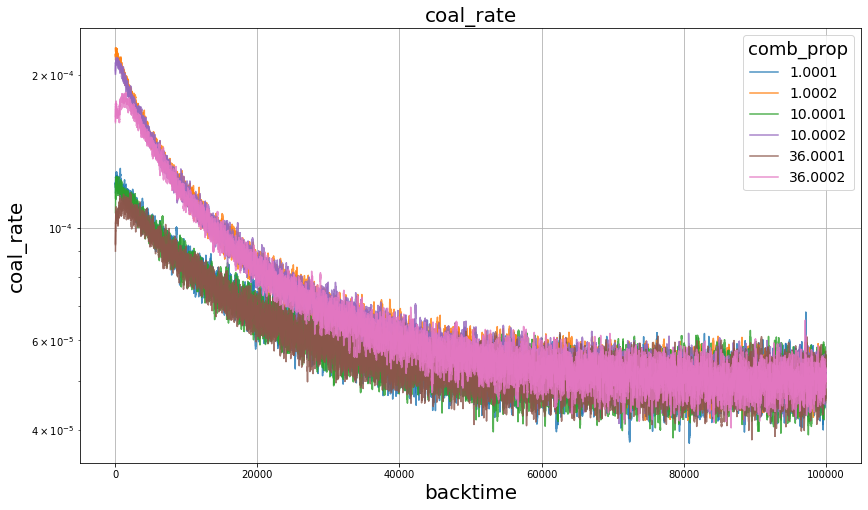

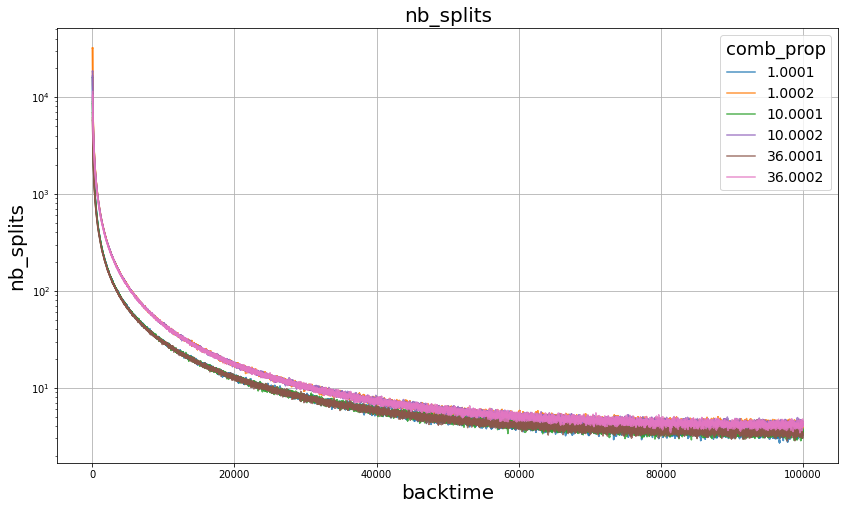

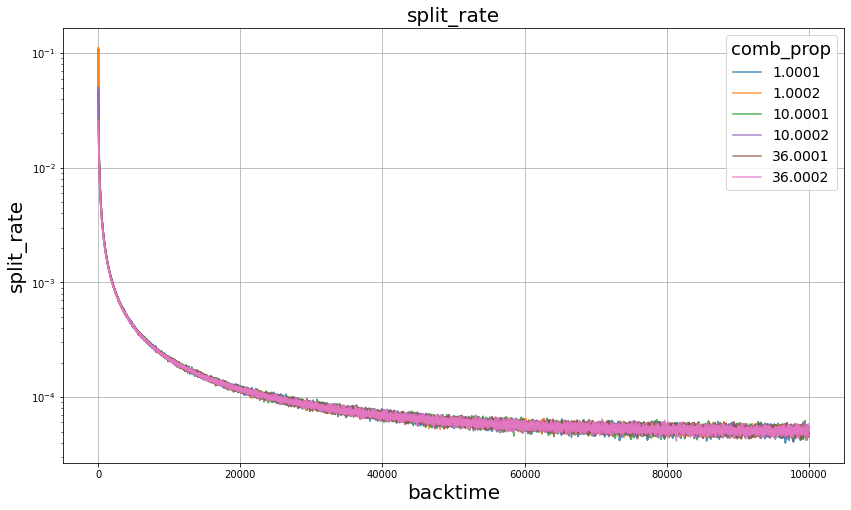

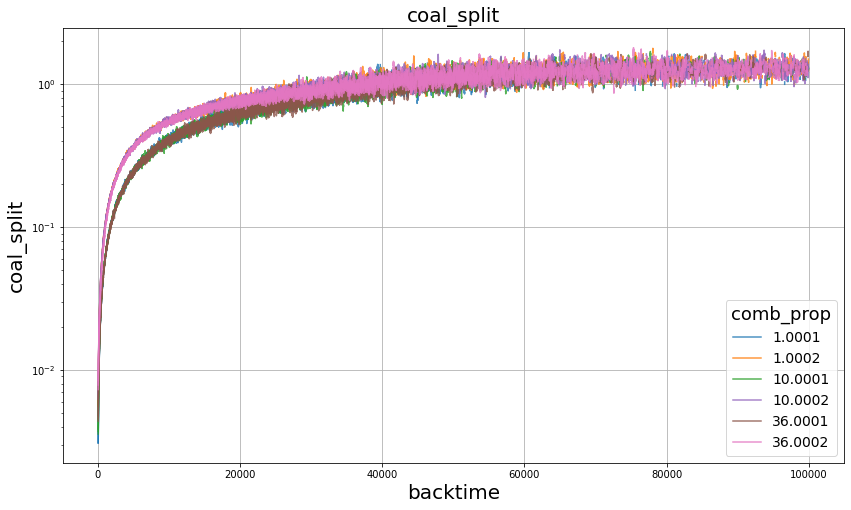

In [17]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:purple", "tab:brown", "tab:pink"]

for prop in ["chr_anc_density","nb_ind_genetic_ancestors","nb_chr_genetic_ancestors",
            "seg_len","nb_fusions", "fusion_rate", "nb_bases",
             "nb_seg_coal", "coal_rate", "nb_splits","split_rate", "coal_split"]:
    
    fig, ax = plt.subplots(figsize=(14,8))
    for i,length in enumerate(np.sort(nbch["comb_prop"].unique())):
        for j,seed in enumerate(nbch["seed"].unique()):
            tmp = nbch[(nbch['comb_prop'] == length) & (nbch['seed']==seed)]
            if j==0:
                label = str(length)
            else:
                label=None
            ax.plot(tmp['backtime'].rolling(window=100).mean(), tmp[prop].rolling(window=100).mean(),
                   c=colors[i], label=label,
                   alpha=.8)
    plt.legend(title="comb_prop", fontsize=14, title_fontsize=18)
    plt.xlabel("backtime", fontsize=20)
    plt.ylabel(prop, fontsize=20)
    plt.title(prop, fontsize=20)
    plt.grid()
    plt.yscale("log")
    #plt.xscale("log")
    plt.show()

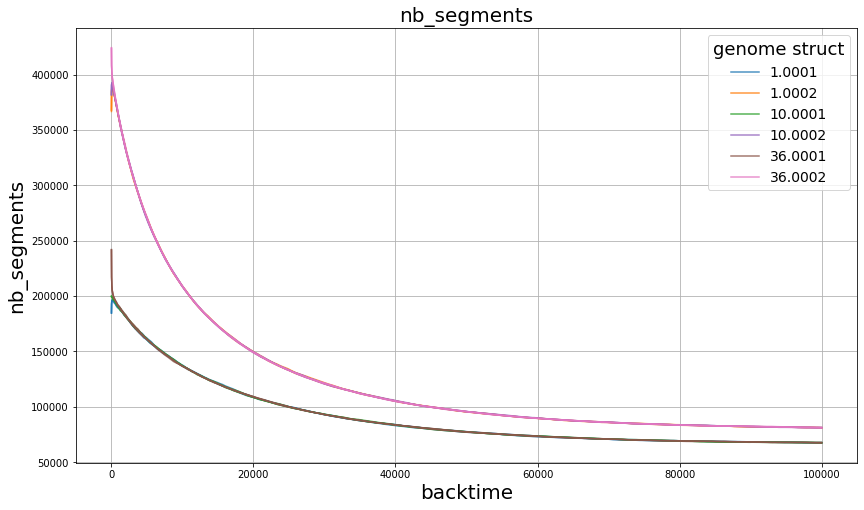

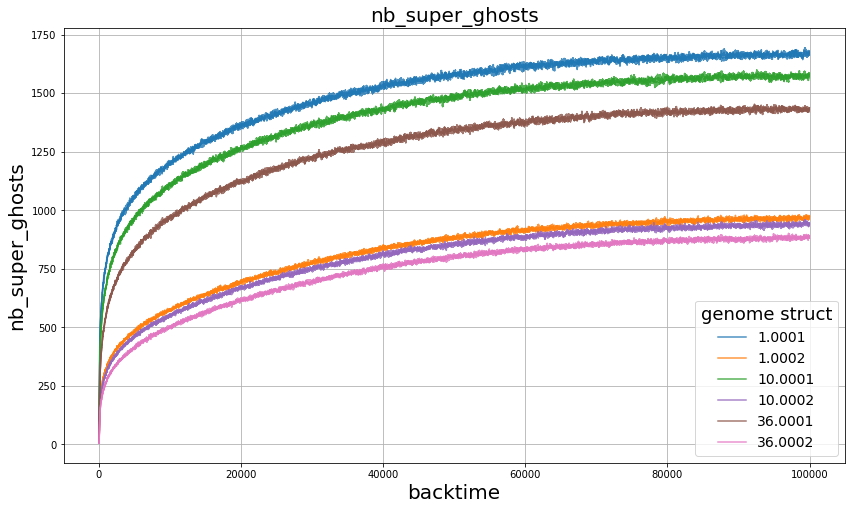

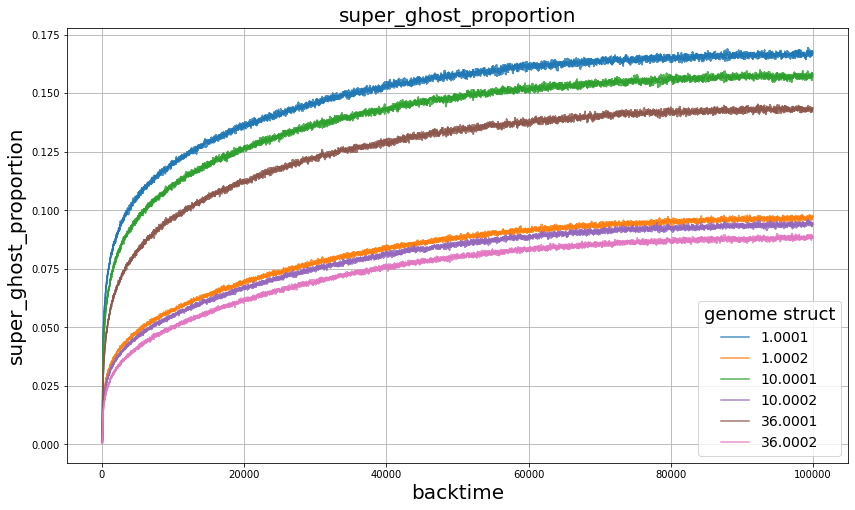

In [20]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:purple", "tab:brown", "tab:pink"]

for prop in ["nb_segments", "nb_super_ghosts", "super_ghost_proportion"]:
    
    fig, ax = plt.subplots(figsize=(14,8))
    for i,length in enumerate(np.sort(nbch["comb_prop"].unique())):
        for j,seed in enumerate(nbch["seed"].unique()):
            tmp = nbch[(nbch['comb_prop'] == length) & (nbch['seed']==seed)]
            if j==0:
                label = str(length)
            else:
                label=None
            ax.plot(tmp['backtime'].rolling(100).mean(), tmp[prop].rolling(100).mean(),
                   c=colors[i], label=label,
                   alpha=.8)
    plt.legend(title="genome struct", fontsize=14, title_fontsize=18)
    plt.xlabel("backtime", fontsize=20)
    plt.ylabel(prop, fontsize=20)
    plt.title(prop, fontsize=20)
    plt.grid()
    plt.show()

# Population size

In [24]:
pop = pd.read_csv("pop.csv", sep=';')
pop['super_ghost_proportion'] = pop['nb_super_ghosts']/pop['pop_size']
pop['fusion_rate'] = pop['nb_fusions']/pop['nb_segments']
pop = pop[(pop['chrlen']==10000) & (pop['nbchr']==36)]
pop['coal_rate'] = pop['nb_seg_coal']/pop['nb_segments']
pop['split_rate'] = pop['nb_splits']/pop['nb_segments']
pop['coal_split'] = pop['coal_rate']/pop['split_rate']
pop['seg_len'] = pop['nb_bases']/pop['nb_segments']
pop

Unnamed: 0  backtime  nb_ind_genealogical_ancestors  \
0                 0         0                             20   
1                 1         1                             18   
2                 2         2                             17   
3                 3         3                             16   
4                 4         4                             16   
...             ...       ...                            ...   
2099995       99995     99995                            162   
2099996       99996     99996                            162   
2099997       99997     99997                            161   
2099998       99998     99998                            161   
2099999       99999     99999                            158   

         nb_ind_genetic_ancestors  nb_chr_genetic_ancestors  nb_segments  \
0                              20                      1440         1440   
1                              18                      1196         1478   
2                              17                      1081         1515   
3                              16                       987         1536   
4                              16                       943         1577   
...                           ...                       ...          ...   
2099995                       160                      2923        13977   
2099996                       161                      2965        14005   
2099997                       160                      2952        14012   
2099998                       161                      3015        14026   
2099999                       157                      3007        14023   

         nb_fusions  nb_seg_coal  nb_splits  nb_bases  ...  pop_size  \
0                 0            0          0  14400000  ...        20   
1               122            0        114   9284468  ...        20   
2               109            0        103   7237510  ...        20   
3               101           11         95   5921175  ...        20   
4                46            8         80   5022614  ...        20   
...             ...          ...        ...       ...  ...       ...   
2099995           0           25         32    360000  ...       200   
2099996           0           13         40    360000  ...       200   
2099997           0           20         34    360000  ...       200   
2099998           0           14         30    360000  ...       200   
2099999           0           37         37    360000  ...       200   

         recomb_rate    seed  exact_ghosts  super_ghost_proportion  \
0             0.0001  987321             1                   0.000   
1             0.0001  987321             1                   0.000   
2             0.0001  987321             1                   0.000   
3             0.0001  987321             1                   0.000   
4             0.0001  987321             1                   0.000   
...              ...     ...           ...                     ...   
2099995       0.0001  987321             1                   0.010   
2099996       0.0001  987321             1                   0.005   
2099997       0.0001  987321             1                   0.005   
2099998       0.0001  987321             1                   0.000   
2099999       0.0001  987321             1                   0.005   

         fusion_rate  coal_rate  split_rate  coal_split       seg_len  
0           0.000000   0.000000    0.000000         NaN  10000.000000  
1           0.082544   0.000000    0.077131    0.000000   6281.778078  
2           0.071947   0.000000    0.067987    0.000000   4777.234323  
3           0.065755   0.007161    0.061849    0.115789   3854.931641  
4           0.029169   0.005073    0.050729    0.100000   3184.916931  
...              ...        ...         ...         ...           ...  
2099995     0.000000   0.001789    0.002289    0.781250     25.756600  
2099996     0.000000   0.000928    0.002856  

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


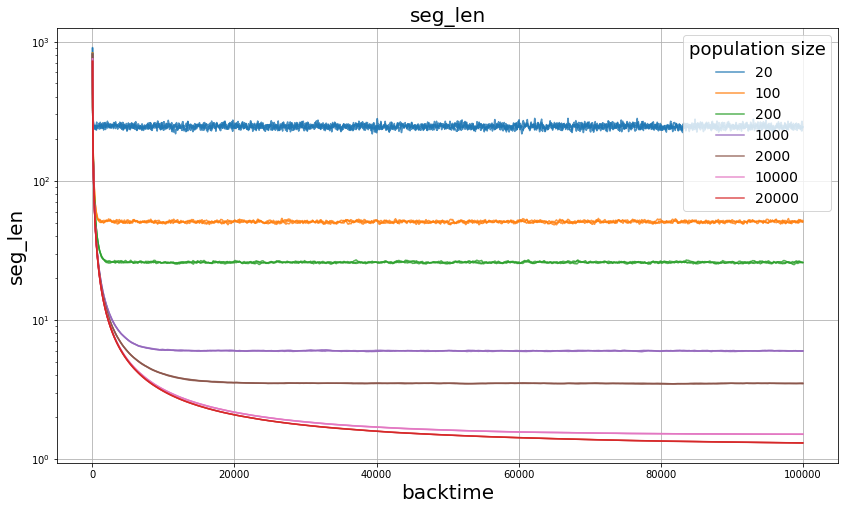

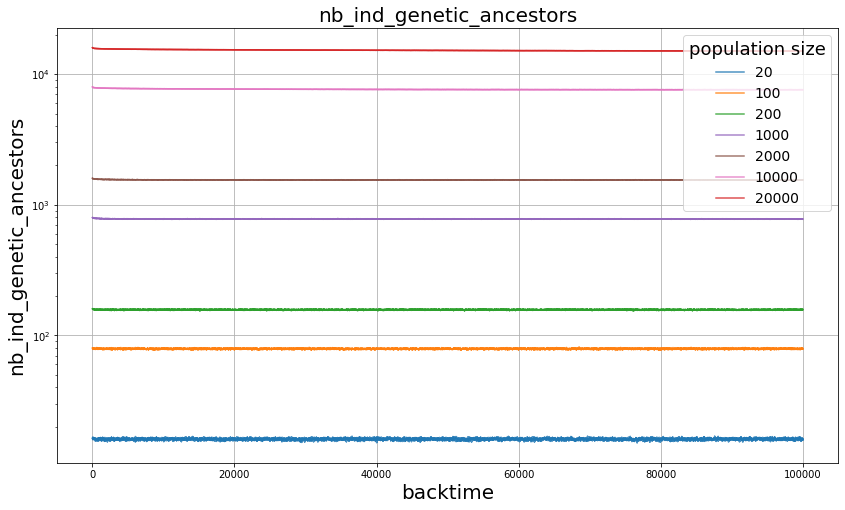

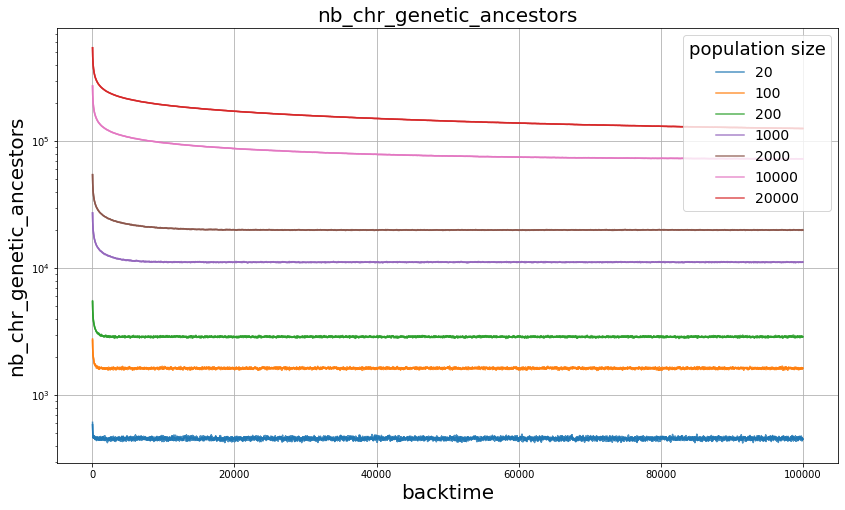

KeyError: 'per_ind_anc'

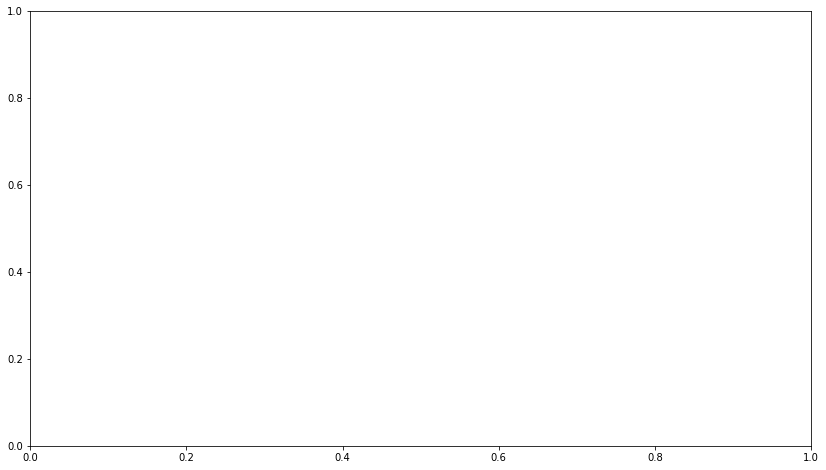

In [28]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:purple", "tab:brown", "tab:pink", "tab:red"]

pop["perc_ind_anc"] = pop["nb_ind_genetic_ancestors"]/pop["pop_size"]
pop["perc_chr_anc"] = pop["nb_chr_genetic_ancestors"]/(2*pop["pop_size"]*pop["nbchr"])

for prop in ["seg_len","nb_ind_genetic_ancestors","nb_chr_genetic_ancestors",
             "per_ind_anc", "perc_chr_anc",
            "nb_fusions", "fusion_rate", "nb_bases", "nb_seg_coal", "coal_rate",
             "nb_splits","split_rate", "coal_split"]:
    
    fig, ax = plt.subplots(figsize=(14,8))
    for i,length in enumerate(np.sort(pop["pop_size"].unique())):
        for j,seed in enumerate(pop["seed"].unique()):
            tmp = pop[(pop['pop_size'] == length) & (pop['seed']==seed)]
            if j==0:
                label = str(length)
            else:
                label=None
            ax.plot(tmp['backtime'].rolling(100).mean(), tmp[prop].rolling(100).mean(),
                   c=colors[i], label=label,
                   alpha=.8)
    plt.legend(title="population size", fontsize=14, title_fontsize=18)
    plt.xlabel("backtime", fontsize=20)
    plt.ylabel(prop, fontsize=20)
    plt.title(prop, fontsize=20)
    plt.grid()
    plt.yscale("log")
    #plt.xscale("log")
    plt.show()

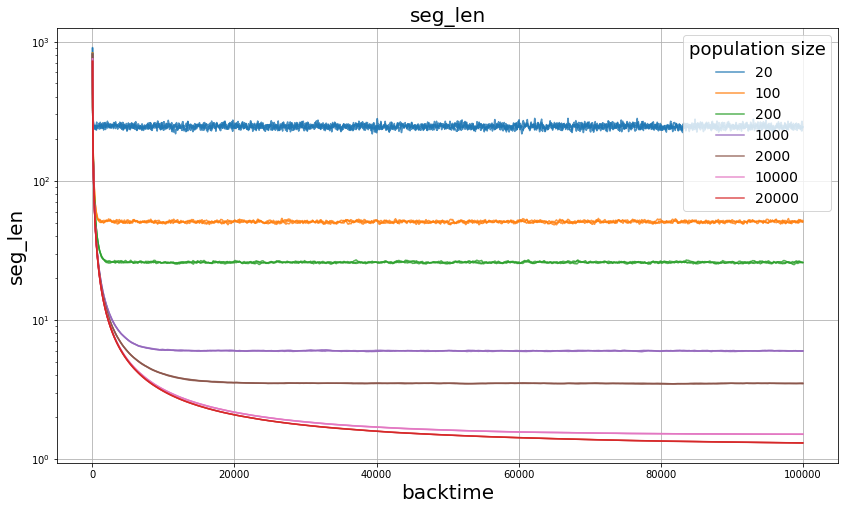

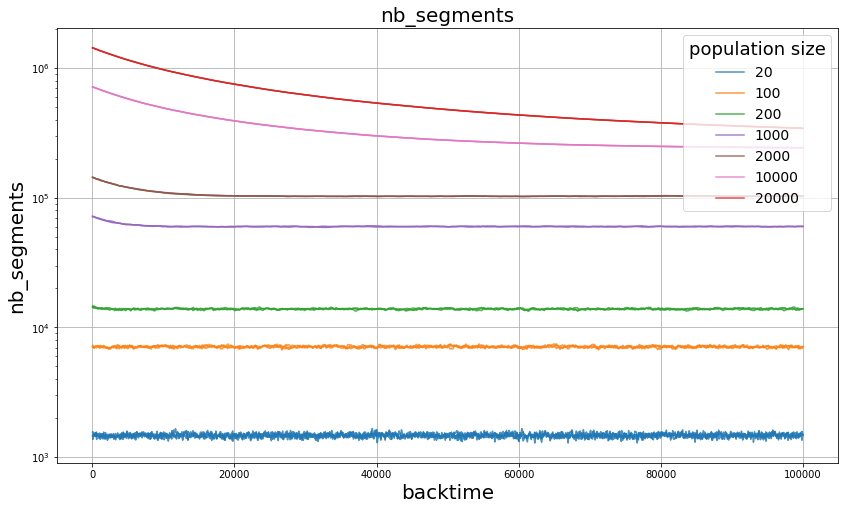

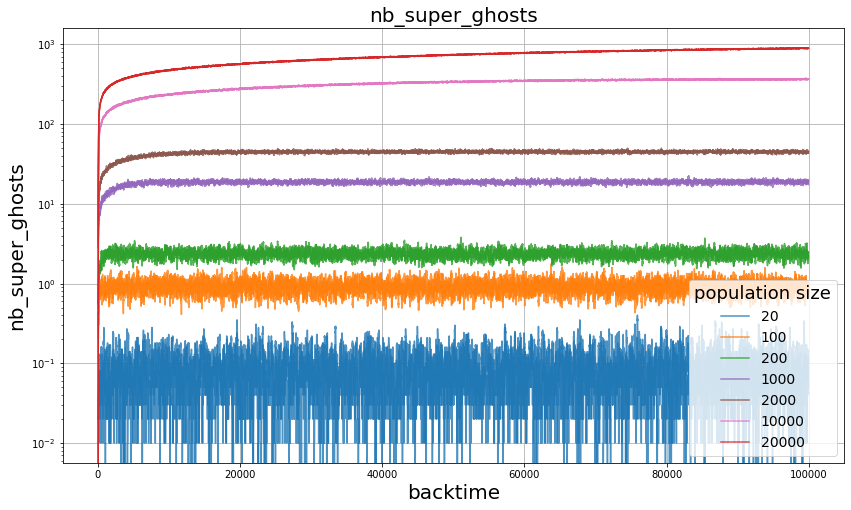

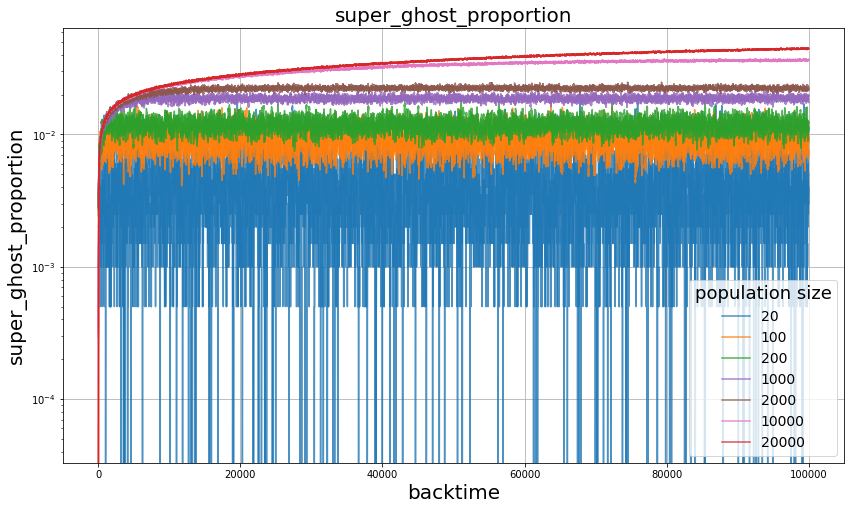

In [26]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:purple", "tab:brown", "tab:pink", "tab:red"]

pop["seg_len"] = pop["nb_bases"]/pop["nb_segments"]
for prop in ["seg_len", "nb_segments", "nb_super_ghosts", "super_ghost_proportion"]:
    
    fig, ax = plt.subplots(figsize=(14,8))
    for i,length in enumerate(np.sort(pop["pop_size"].unique())):
        for j,seed in enumerate(pop["seed"].unique()):
            tmp = pop[(pop['pop_size'] == length) & (pop['seed']==seed)]
            if j==0:
                label = str(length)
            else:
                label=None
            ax.plot(tmp['backtime'].rolling(100).mean(), tmp[prop].rolling(100).mean(),
                   c=colors[i], label=label,
                   alpha=.8)
    plt.legend(title="population size", fontsize=14, title_fontsize=18)
    plt.xlabel("backtime", fontsize=20)
    plt.ylabel(prop, fontsize=20)
    plt.title(prop, fontsize=20)
    plt.yscale("log")
    plt.grid()
    plt.show()

# Recombination rate

In [27]:
recomb = pd.read_csv("recomb_rates.csv", sep=';')
recomb['super_ghost_proportion'] = recomb['nb_super_ghosts']/recomb['pop_size']
recomb['fusion_rate'] = recomb['nb_fusions']/recomb['nb_segments']
recomb['coal_rate'] = recomb['nb_seg_coal']/recomb['nb_segments']
recomb['split_rate'] = recomb['nb_splits']/recomb['nb_segments']
recomb['coal_split'] = recomb['coal_rate']/recomb['split_rate']
recomb['seg_len'] = recomb['nb_bases']/recomb['nb_segments']
recomb

Unnamed: 0  backtime  nb_ind_genealogical_ancestors  \
0                 0         0                          10000   
1                 1         1                           8668   
2                 2         2                           8233   
3                 3         3                           8064   
4                 4         4                           8028   
...             ...       ...                            ...   
1199995       99995     99995                           7919   
1199996       99996     99996                           7932   
1199997       99997     99997                           7932   
1199998       99998     99998                           7963   
1199999       99999     99999                           7905   

         nb_ind_genetic_ancestors  nb_chr_genetic_ancestors  nb_segments  \
0                           10000                    720000       720000   
1                            8668                    547259       602304   
2                            8233                    465990       549634   
3                            8064                    416612       519159   
4                            8028                    382540       499880   
...                           ...                       ...          ...   
1199995                      7042                     36861        81207   
1199996                      7020                     36873        81208   
1199997                      7086                     36836        81206   
1199998                      7093                     36847        81206   
1199999                      7032                     36833        81207   

         nb_fusions  nb_seg_coal  nb_splits    nb_bases  ...  pop_size  \
0                 0            0          0  1999440000  ...     10000   
1             21085           25      32078  1263425473  ...     10000   
2             12216           34      20084   937103208  ...     10000   
3              8196           59      23498   747519916  ...     10000   
4              6705           48      15654   624043191  ...     10000   
...             ...          ...        ...         ...  ...       ...   
1199995           0            6          3      101990  ...     10000   
1199996           0            2          3      101990  ...     10000   
1199997           0            6          4      101990  ...     10000   
1199998           1            4          5      101989  ...     10000   
1199999           0            4          5      101989  ...     10000   

         recomb_rate     seed  exact_ghosts  super_ghost_proportion  \
0             0.0002   987321             0                  0.0000   
1             0.0002   987321             0                  0.0000   
2             0.0002   987321             0                  0.0000   
3             0.0002   987321             0                  0.0000   
4             0.0002   987321             0                  0.0000   
...              ...      ...           ...                     ...   
1199995       0.0002  4334892             0                  0.0877   
1199996       0.0002  4334892             0                  0.0912   
1199997       0.0002  4334892             0                  0.0846   
1199998       0.0002  4334892             0                  0.0870   
1199999       0.0002  4334892             0                  0.0873   

         fusion_rate  coal_rate  split_rate  coal_split      seg_len  
0           0.000000   0.000000    0.000000         NaN  2777.000000  
1           0.035007   0.000042    0.053259    0.000779  2097.654130  
2           0.022226   0.000062    0.036541    0.001693  1704.958587  
3           0.015787   0.000114    0.045262    0.002511  1439.867008  
4           0.013413   0.000096    0.031316    0.003066  1248.385995  
...              ...        ...         ...         ...          ...  
1199995     0.000000   0.000074    0.000037    2.000000     1.255926  
1199996     0.000

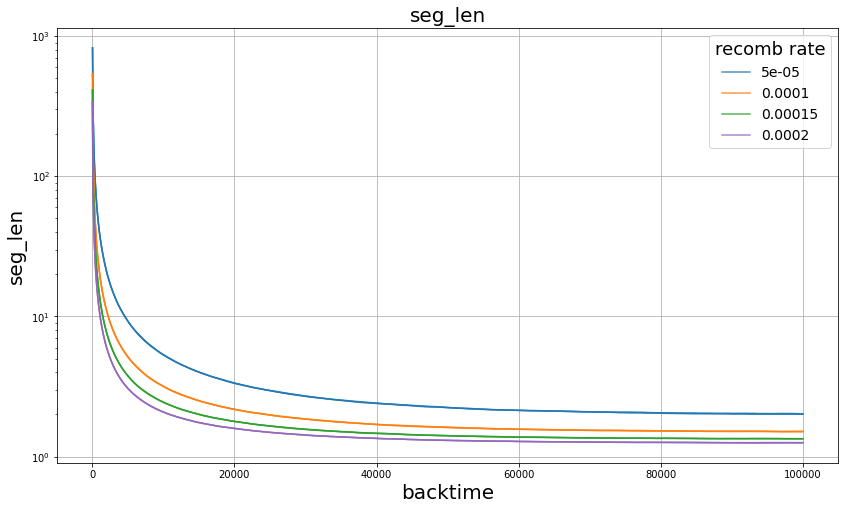

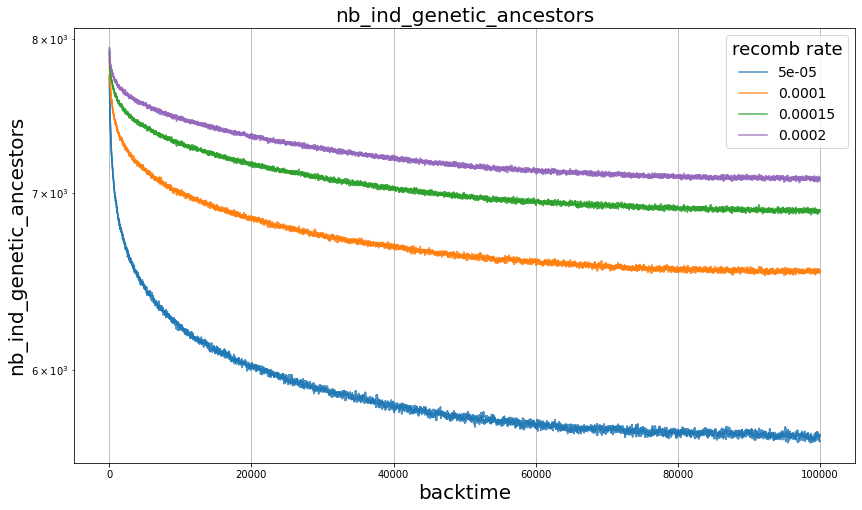

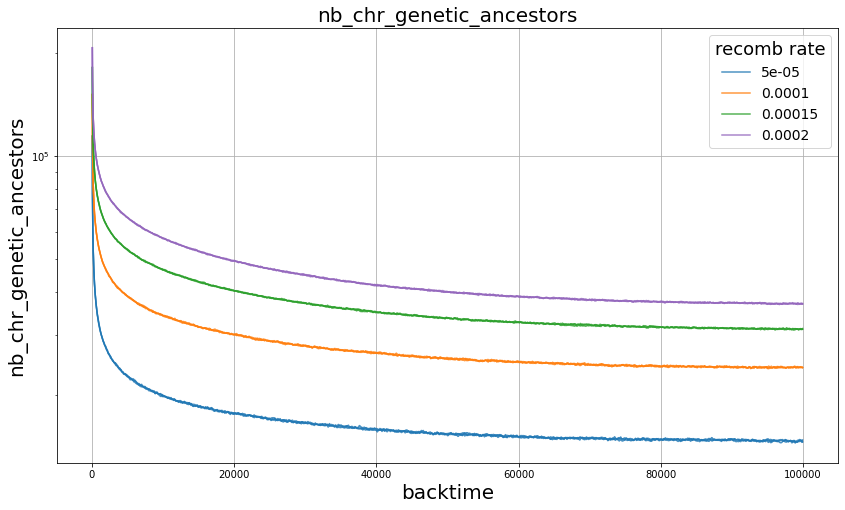

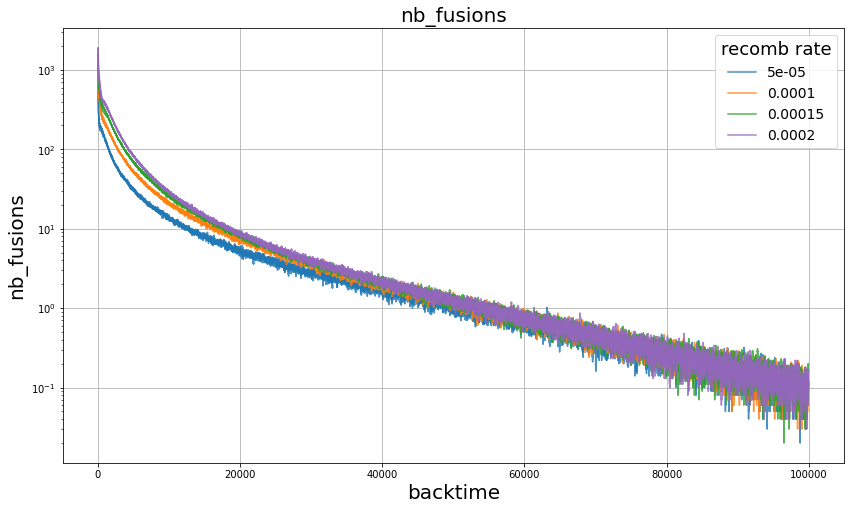

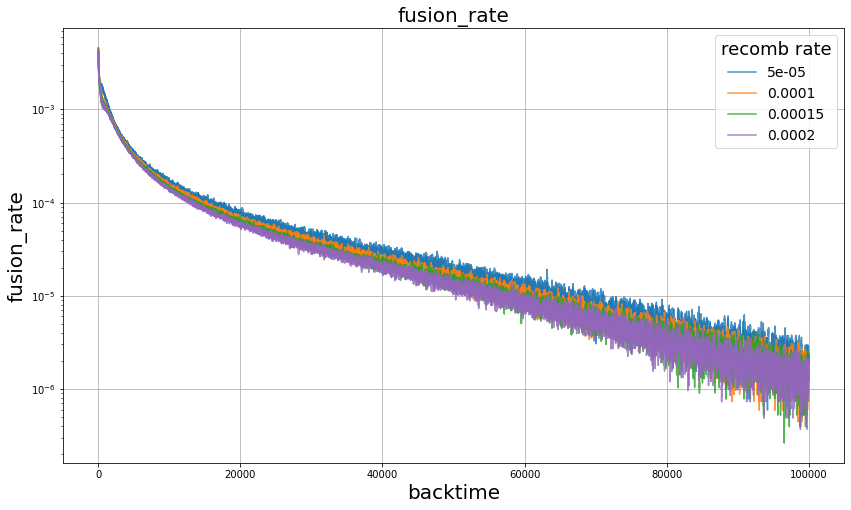

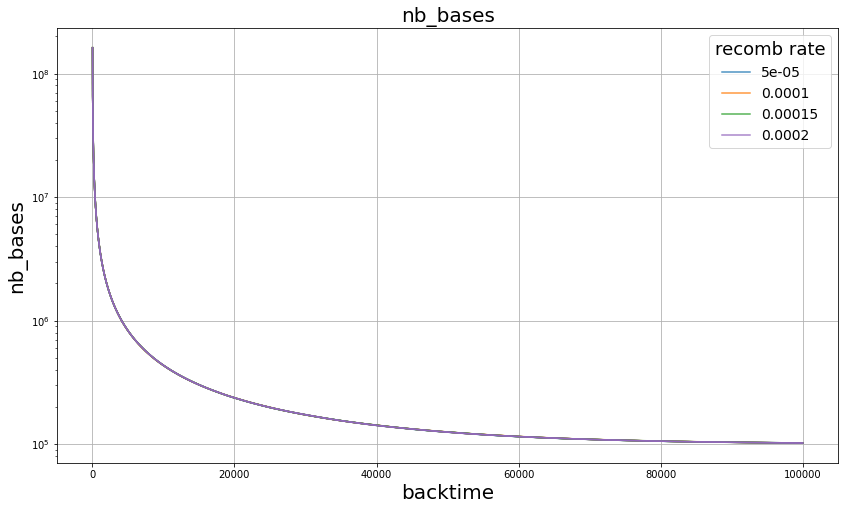

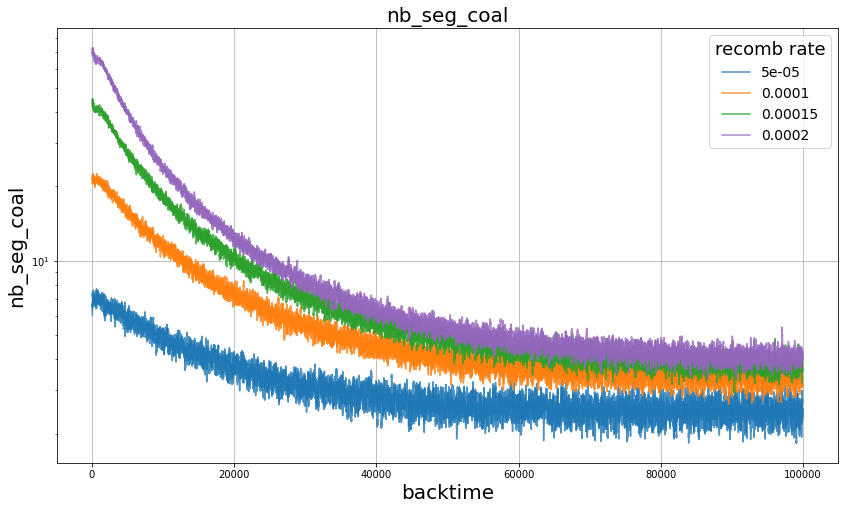

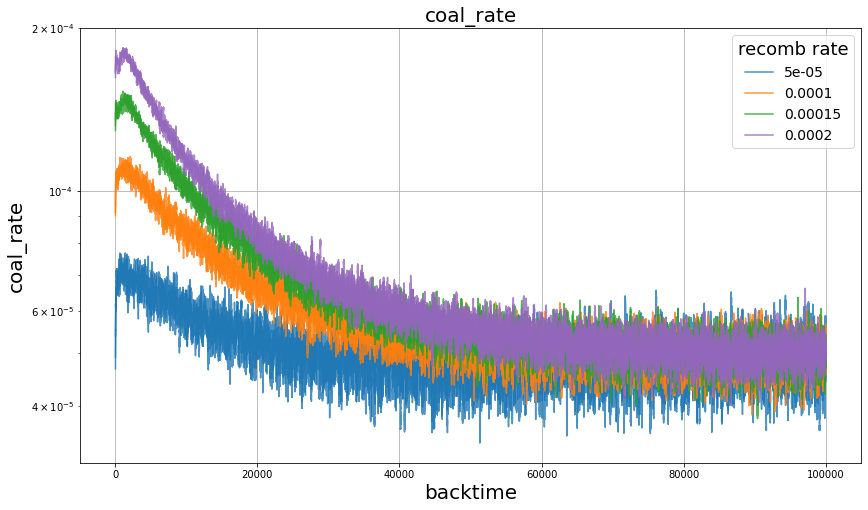

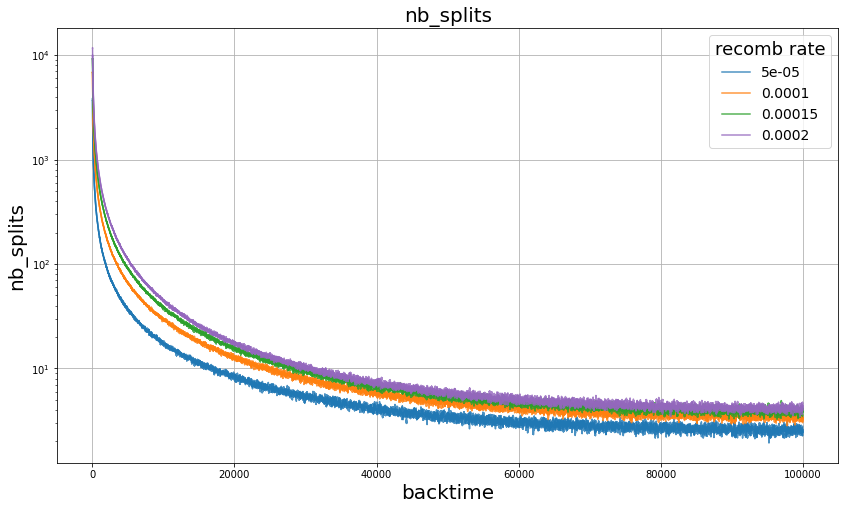

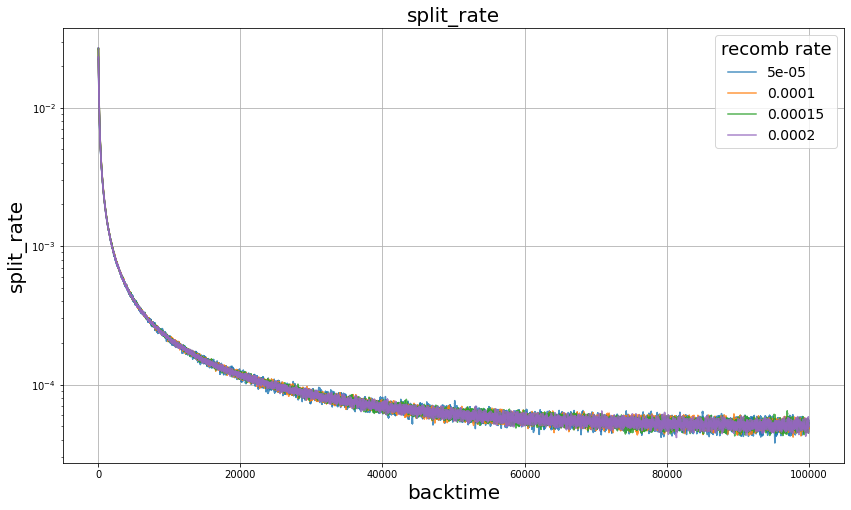

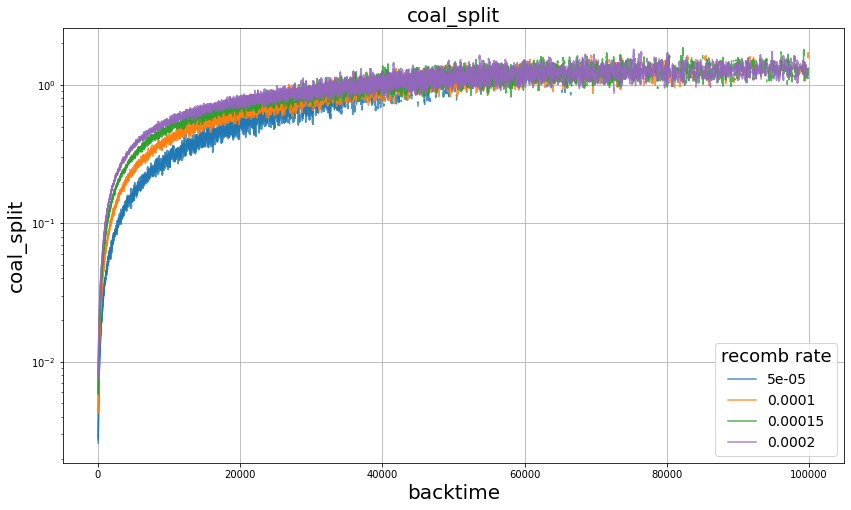

In [30]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:purple", "tab:brown", "tab:pink", "tab:red"]

for prop in ["seg_len","nb_ind_genetic_ancestors","nb_chr_genetic_ancestors",
            "nb_fusions", "fusion_rate", "nb_bases", "nb_seg_coal", "coal_rate",
             "nb_splits","split_rate", "coal_split"]:
    
    fig, ax = plt.subplots(figsize=(14,8))
    for i,length in enumerate(np.sort(recomb["recomb_rate"].unique())):
        for j,seed in enumerate(recomb["seed"].unique()):
            tmp = recomb[(recomb['recomb_rate'] == length) & (recomb['seed']==seed)]
            if j==0:
                label = str(length)
            else:
                label=None
            ax.plot(tmp['backtime'].rolling(100).mean(), tmp[prop].rolling(100).mean(),
                   c=colors[i], label=label,
                   alpha=.8)
    plt.legend(title="recomb rate", fontsize=14, title_fontsize=18)
    plt.xlabel("backtime", fontsize=20)
    plt.ylabel(prop, fontsize=20)
    plt.title(prop, fontsize=20)
    plt.grid()
    plt.yscale("log")
    #plt.xscale("log")
    plt.show()

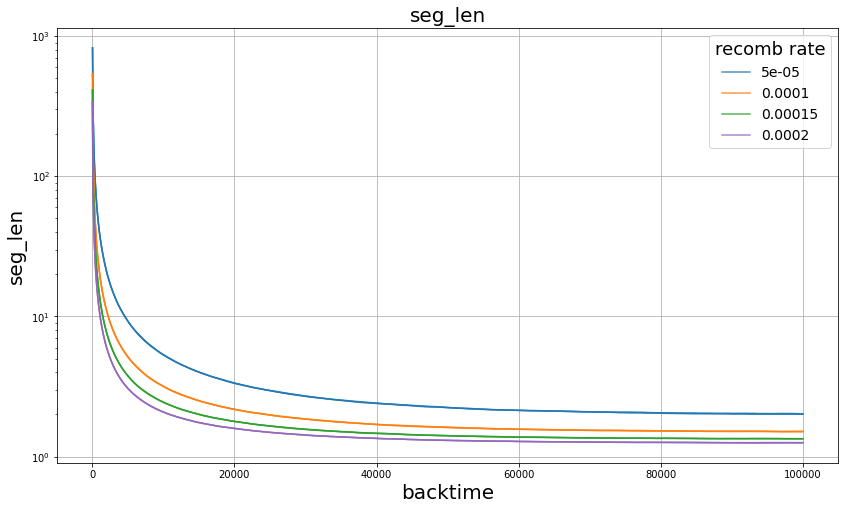

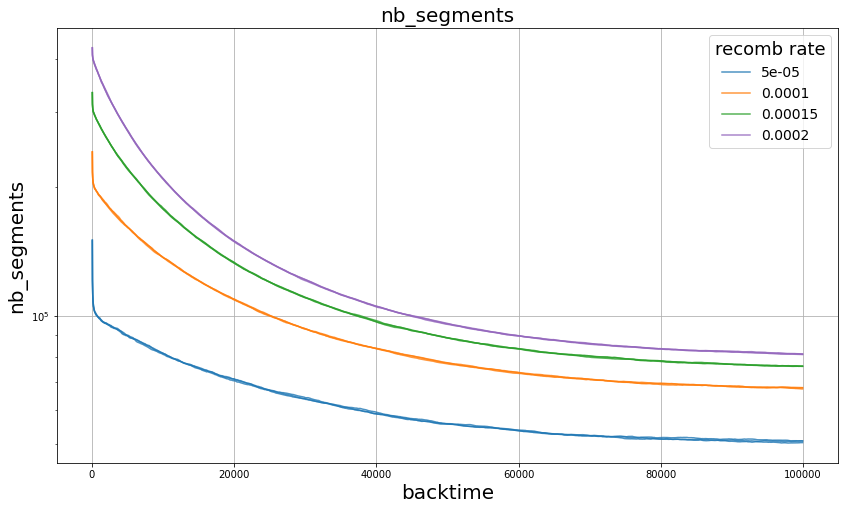

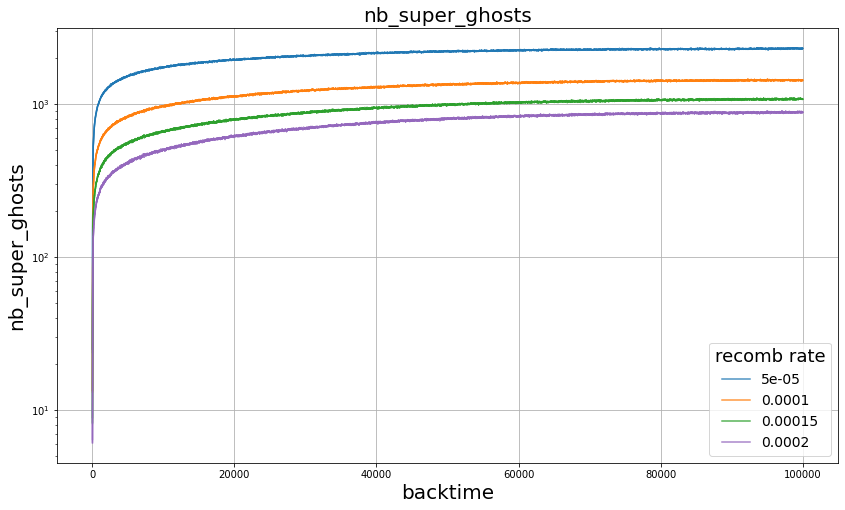

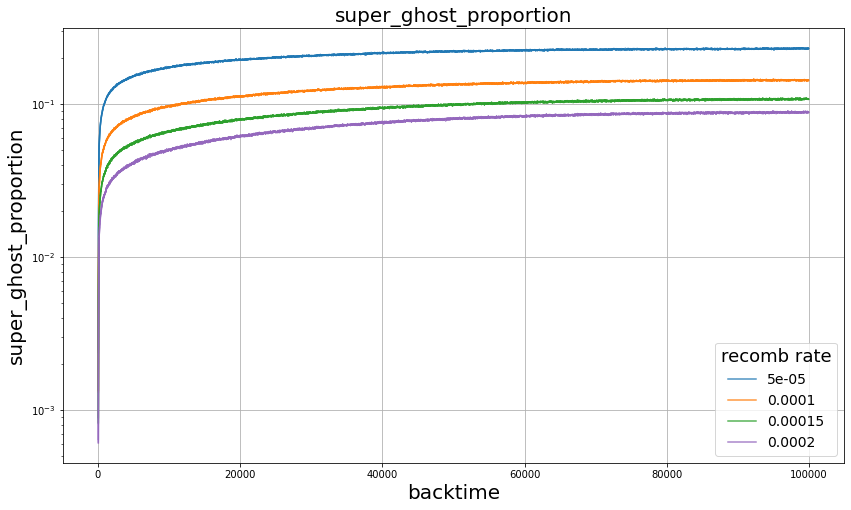

In [31]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:purple", "tab:brown", "tab:pink", "tab:red"]

recomb["seg_len"] = recomb["nb_bases"]/recomb["nb_segments"]
for prop in ["seg_len", "nb_segments", "nb_super_ghosts", "super_ghost_proportion"]:
    
    fig, ax = plt.subplots(figsize=(14,8))
    for i,length in enumerate(np.sort(recomb["recomb_rate"].unique())):
        for j,seed in enumerate(recomb["seed"].unique()):
            tmp = recomb[(recomb['recomb_rate'] == length) & (recomb['seed']==seed)]
            if j==0:
                label = str(length)
            else:
                label=None
            ax.plot(tmp['backtime'].rolling(100).mean(), tmp[prop].rolling(100).mean(),
                   c=colors[i], label=label,
                   alpha=.8)
    plt.legend(title="recomb rate", fontsize=14, title_fontsize=18)
    plt.xlabel("backtime", fontsize=20)
    plt.ylabel(prop, fontsize=20)
    plt.title(prop, fontsize=20)
    plt.yscale("log")
    plt.grid()
    plt.show()

# Endpoints

In [29]:
eq = pd.read_csv("lengths.csv", sep=';')
eq['super_ghost_proportion'] = eq['nb_super_ghosts']/eq['pop_size']
eq['fusion_rate'] = eq['nb_fusions']/eq['nb_segments']
eq['seg_len'] = eq['nb_bases']/eq['nb_segments']
end_values = pd.DataFrame()
for clen in eq['chrlen'].unique():
    for p in eq['pop_size'].unique():
        for s in eq['seed'].unique():
            for n in eq['nbchr'].unique():
                tmp = eq[(eq['chrlen']==clen) & (eq['pop_size']==p)
                        & (eq['seed']==s) & (eq['nbchr']==n)]
                if not tmp.empty:
                    max_gen = max(tmp['backtime'])
                    tmp  = tmp[tmp['backtime']==max_gen]
                    end_values = pd.concat([end_values,tmp])
            
end_values

Unnamed: 0  backtime  nb_ind_genealogical_ancestors  \
20572        20572     20572                           7958   
319321       19819     19819                           8007   
279708       20586     20586                           7999   
198701       20514     20514                           7937   
99095        19788     19788                           8007   
47184        20522     20522                           7916   
366358        1970      1970                            791   
22538         1965      1965                            809   
146134        1968      1968                            793   
259121         193       193                             84   
22735          196       196                             78   
47768          194       194                             84   
103013        3917      3917                           1617   
26661         3925      3925                           1597   
323235        3913      3913                           1613   
47573          388       388                            157   
407773         394       394                            167   
178115         397       397                            163   
79306        31537     31537                          15908   
177717       31582     31582                          15894   
198737          35        35                             16   
178148          32        32                             14   
178186          37        37                             15   
123602       20588     20588                           7954   
218526       19788     19788                           8007   
258927       20602     20602                           7965   
407378       20547     20547                           7980   
238324       19797     19797                           7949   
144165       20562     20562                           7999   
386830       20471     20471                           7932   
364387       20568     20568                           7949   
299501       19792     19792                           7899   
343818       20582     20582                           7992   

        nb_ind_genetic_ancestors  nb_chr_genetic_ancestors  nb_segments  \
20572                       7733                     93711       606016   
319321                      7746                     93501       614499   
279708                      7767                     93893       605733   
198701                      7644                     87843       390579   
99095                       7717                     87419       392087   
47184                       7669                     87677       390462   
366358                       781                     12933        66549   
22538                        794                     12790        66707   
146134                       784                     12715        66584   
259121                        84                      1971         7193   
22735                         77                      1918         7362   
47768                         84                      1980         7136   
103013                      1581                     22982       124196   
26661                       1562                     22797       123769   
323235                      1582                     22940       124215   
47573                        156                      3422        14219   
407773                       162                      3352        14254   
178115                       162                      3361        14535   
79306                      15293                    161236       622039   
177717                     15308                    160622       621888   
198737                        16                       572         1562   
178148                        14                       484         1317   
178186                        15                       520         1456   
123602                      7696                     95267       

/tmp/ipykernel_512451/4081067780.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=prop, fontsize=14, title_fontsize=18)


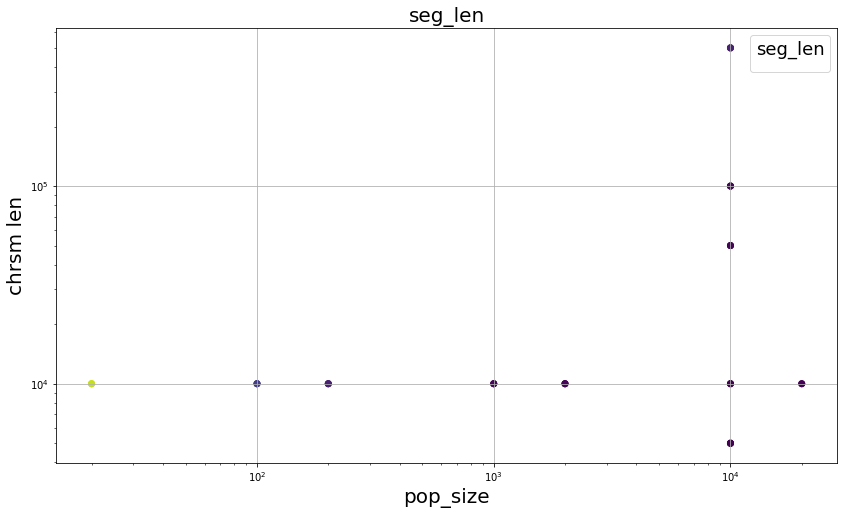

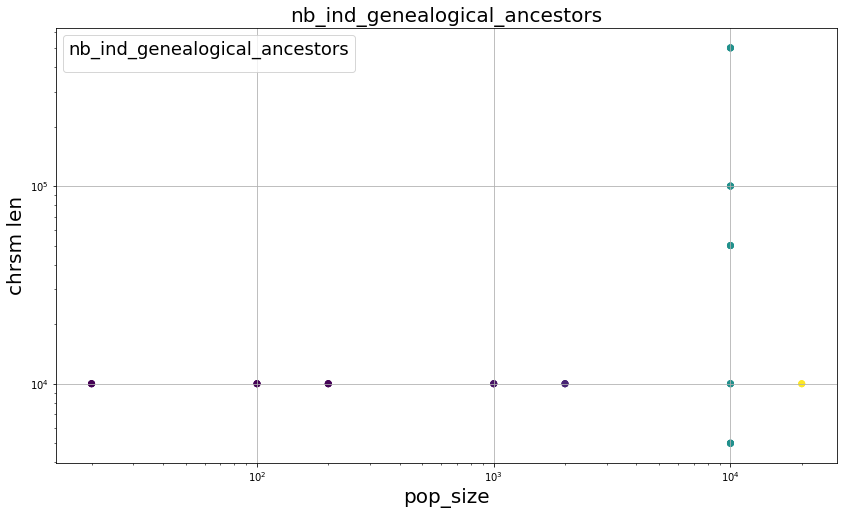

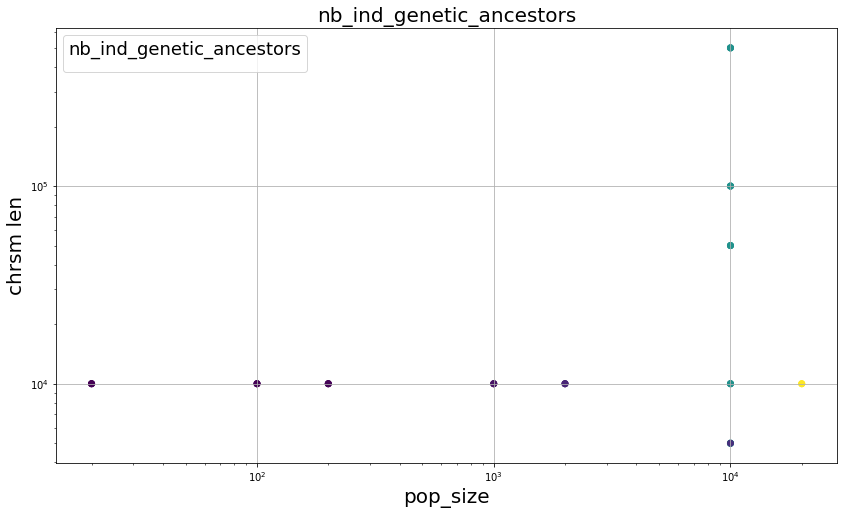

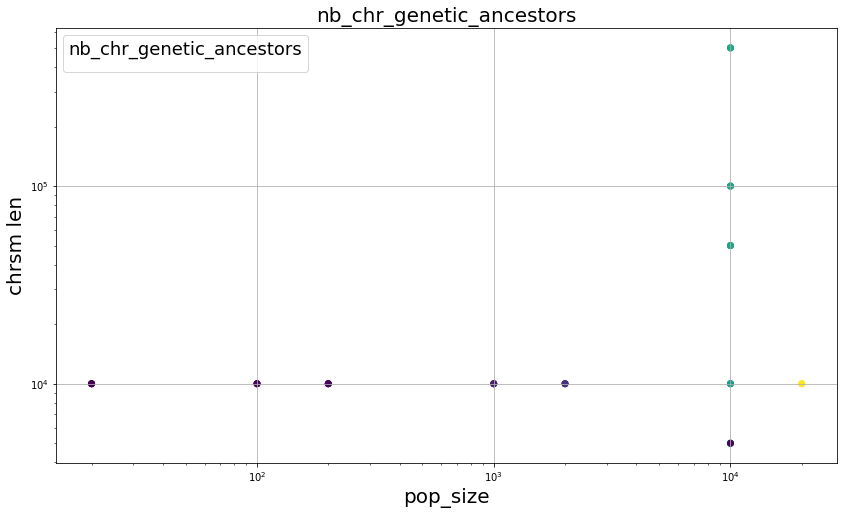

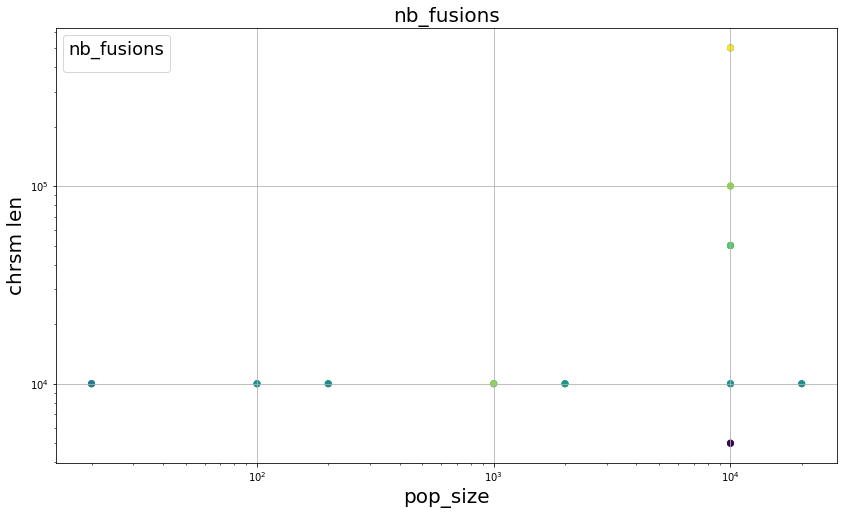

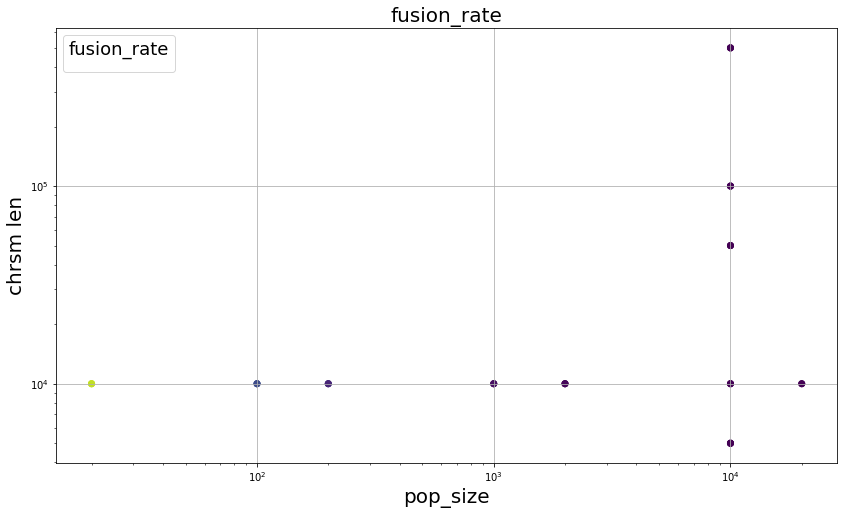

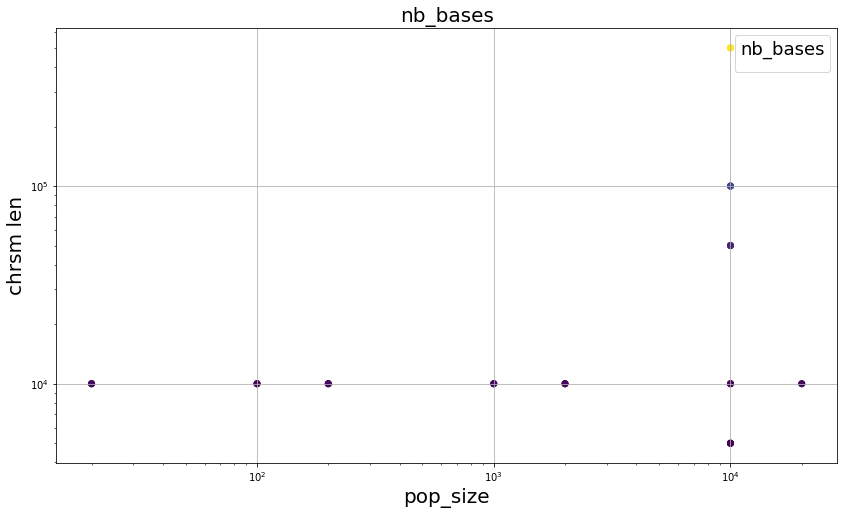

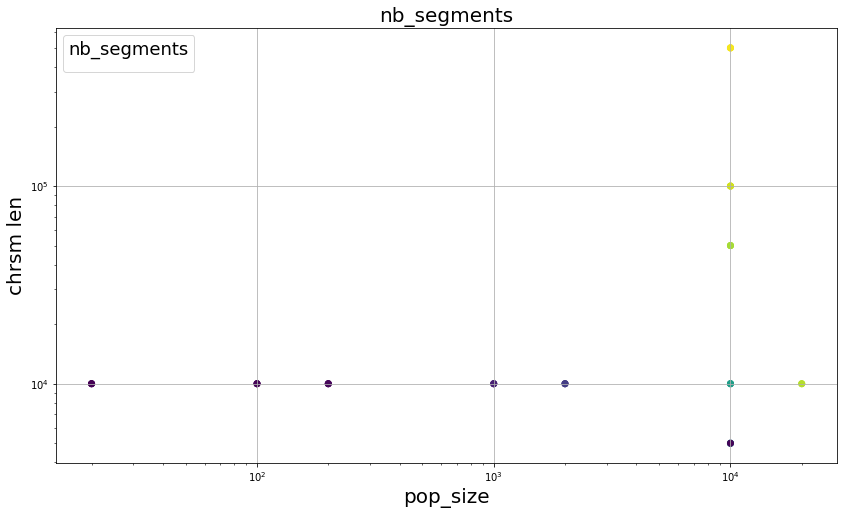

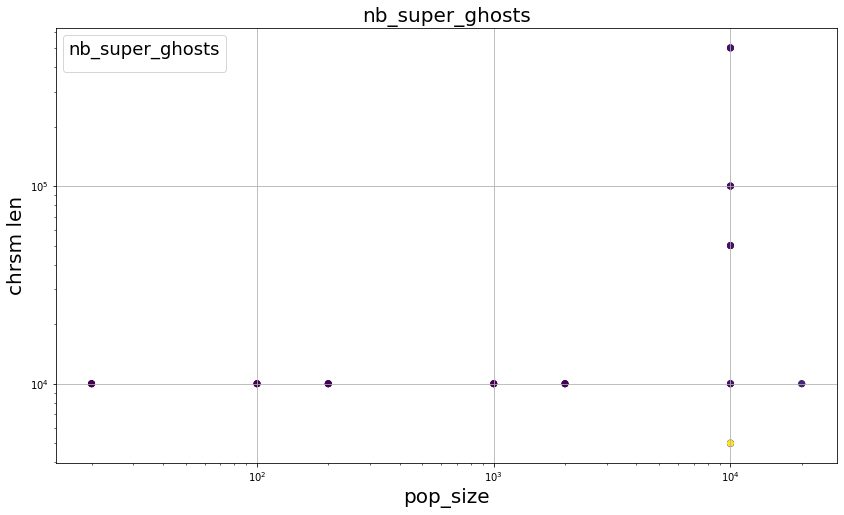

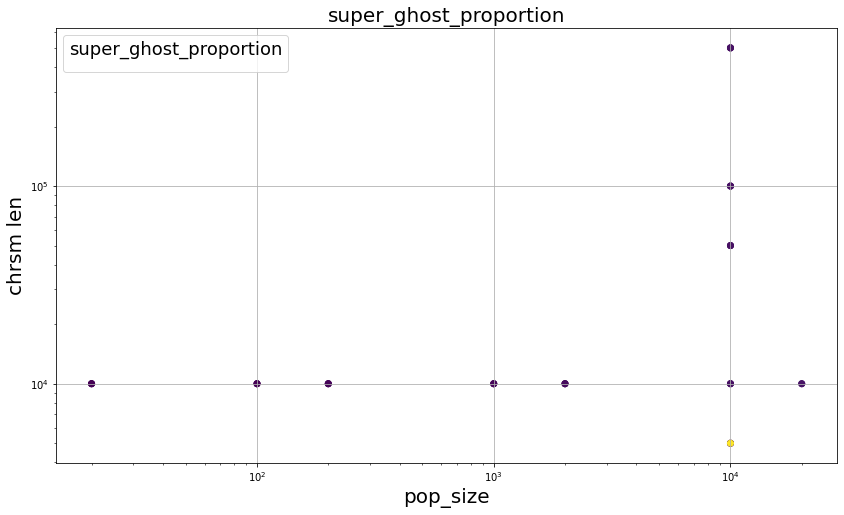

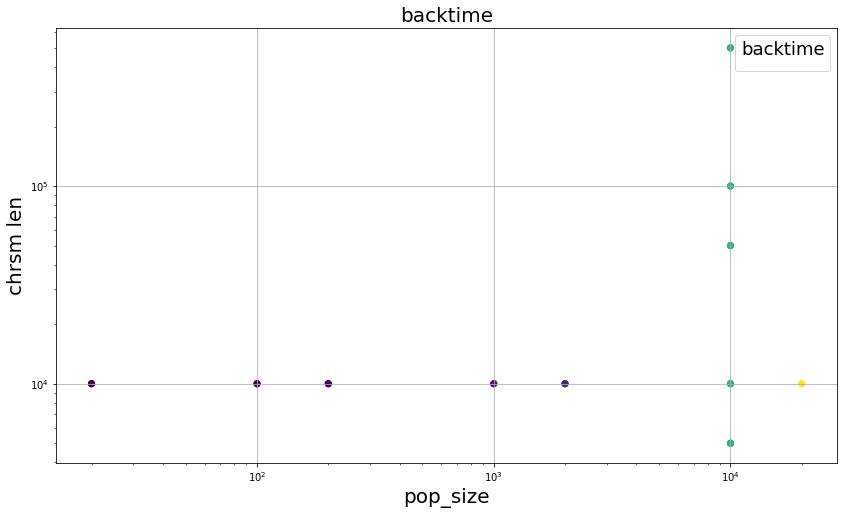

In [21]:
for prop in ["nb_ind_genealogical_ancestors", "nb_ind_genetic_ancestors","nb_chr_genetic_ancestors",
            "nb_fusions", "fusion_rate", "nb_bases","nb_segments","nb_super_ghosts","super_ghost_proportion"
            ,"backtime"]:
     
    fig, ax = plt.subplots(figsize=(14,8))
    ax.scatter(end_values['pop_size'], end_values['chrlen'],
           c=end_values[prop])
           
    plt.legend(title=prop, fontsize=14, title_fontsize=18)
    plt.xlabel("pop_size", fontsize=20)
    plt.ylabel("chrsm len", fontsize=20)
    plt.title(prop, fontsize=20)
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
    

/tmp/ipykernel_512451/276244854.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=prop, fontsize=14, title_fontsize=18)


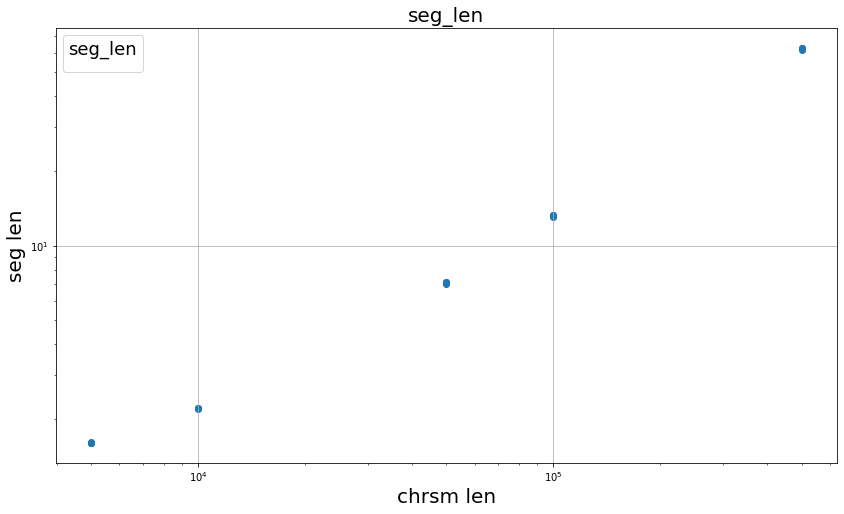

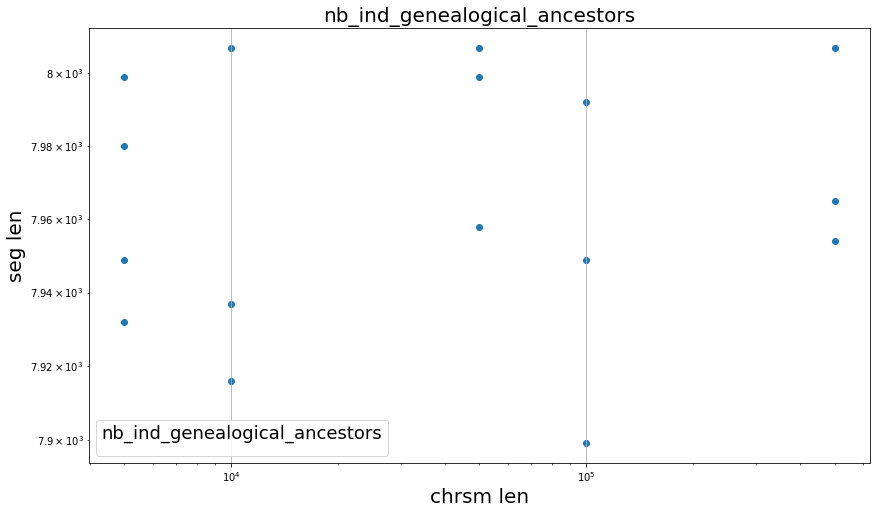

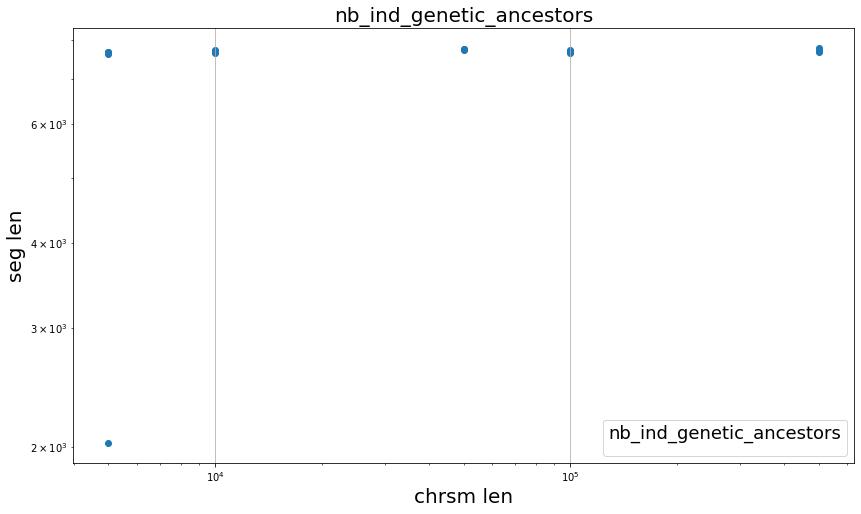

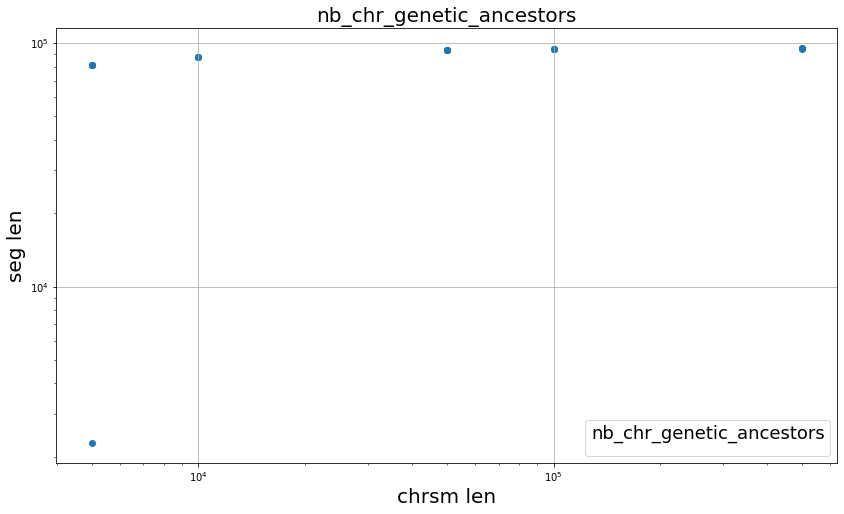

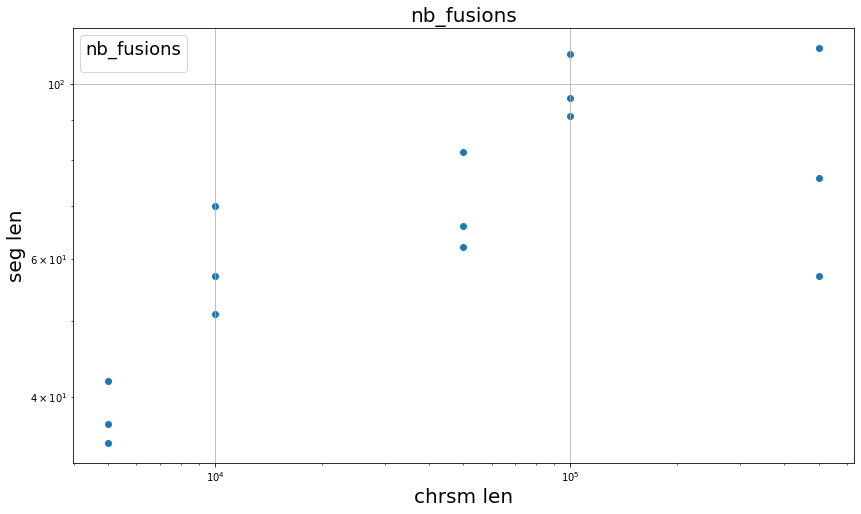

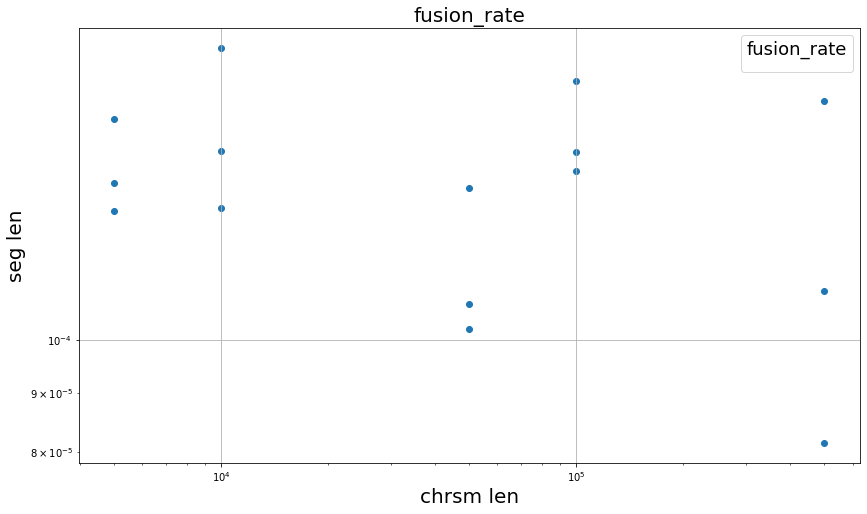

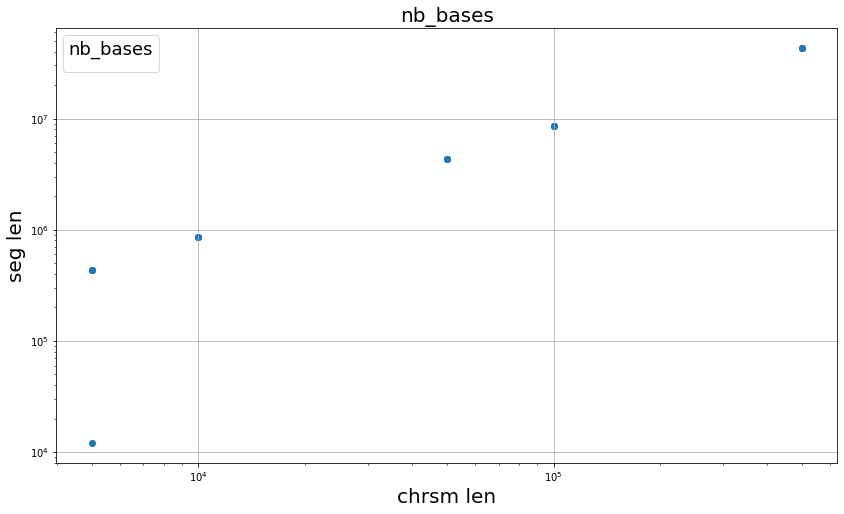

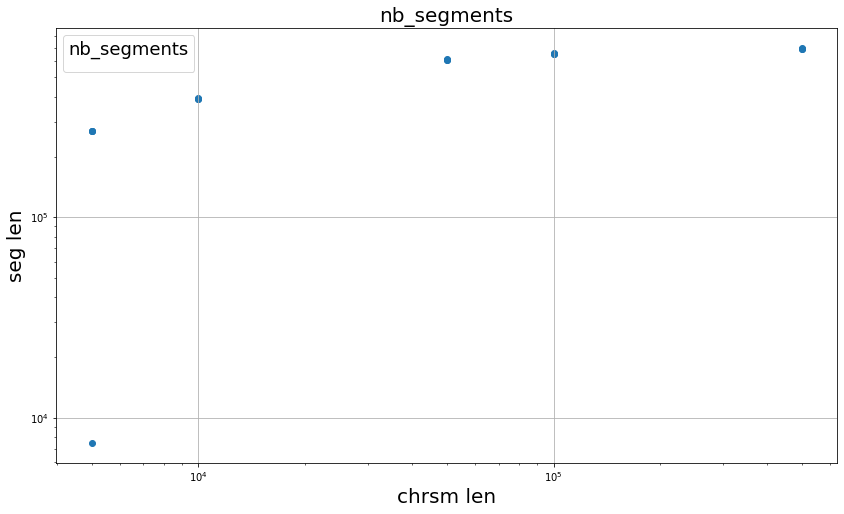

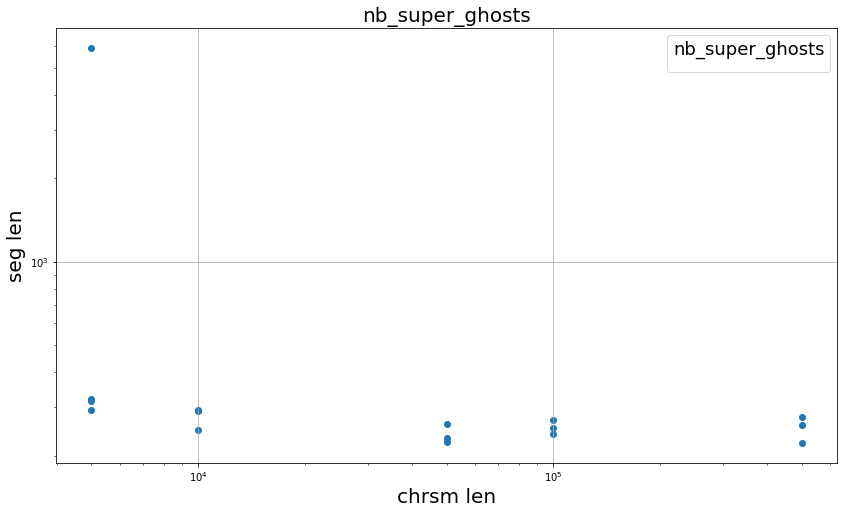

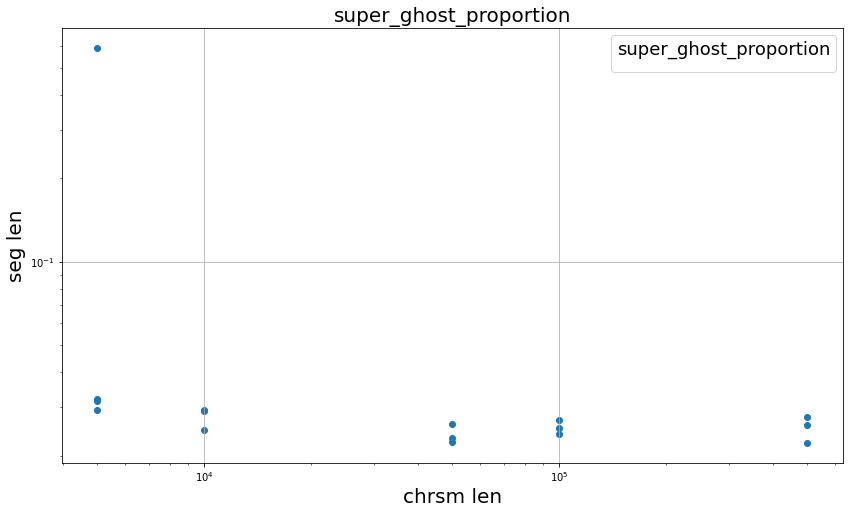

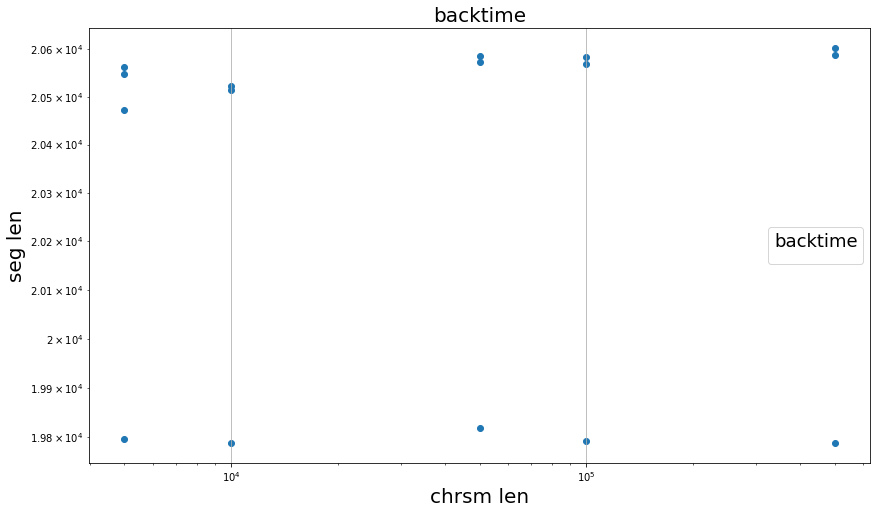

In [23]:
end_values = end_values[end_values["pop_size"]==10000]
for prop in ["seg_len", "nb_ind_genealogical_ancestors", "nb_ind_genetic_ancestors","nb_chr_genetic_ancestors",
            "nb_fusions", "fusion_rate", "nb_bases","nb_segments","nb_super_ghosts","super_ghost_proportion"
            ,"backtime"]:
     
    fig, ax = plt.subplots(figsize=(14,8))
    ax.scatter(end_values['chrlen'],
           end_values[prop])
           
    plt.legend(title=prop, fontsize=14, title_fontsize=18)
    plt.xlabel("chrsm len", fontsize=20)
    plt.ylabel(prop, fontsize=20)
    plt.title(prop, fontsize=20)
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
    

/tmp/ipykernel_512451/2471164352.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=prop, fontsize=14, title_fontsize=18)


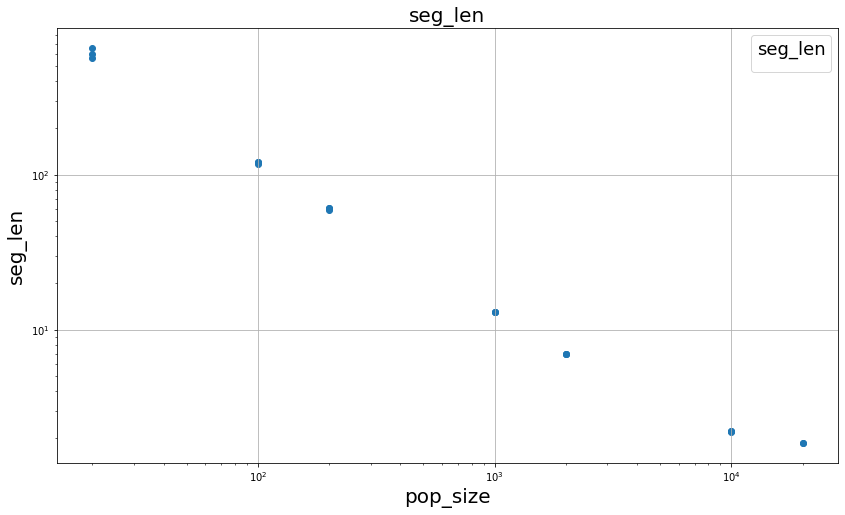

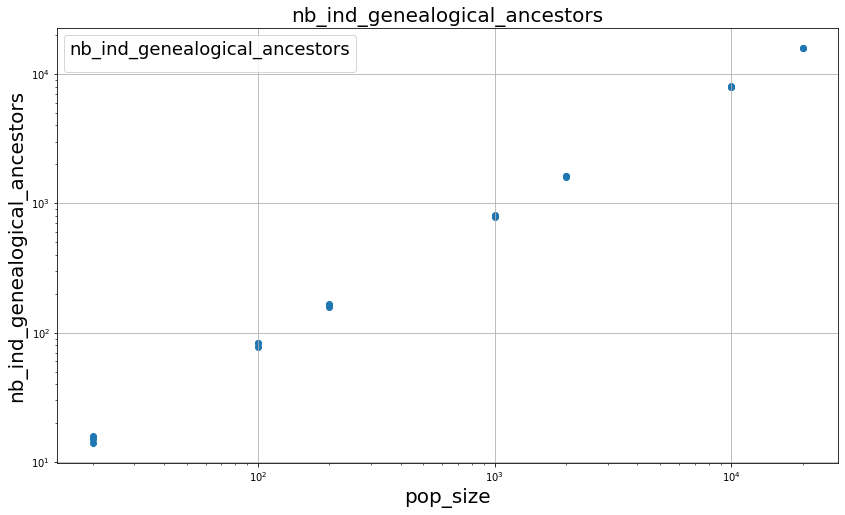

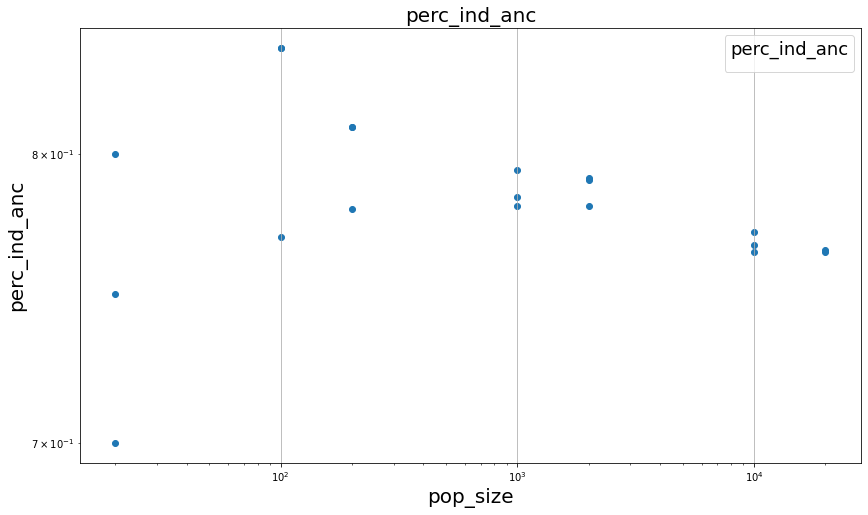

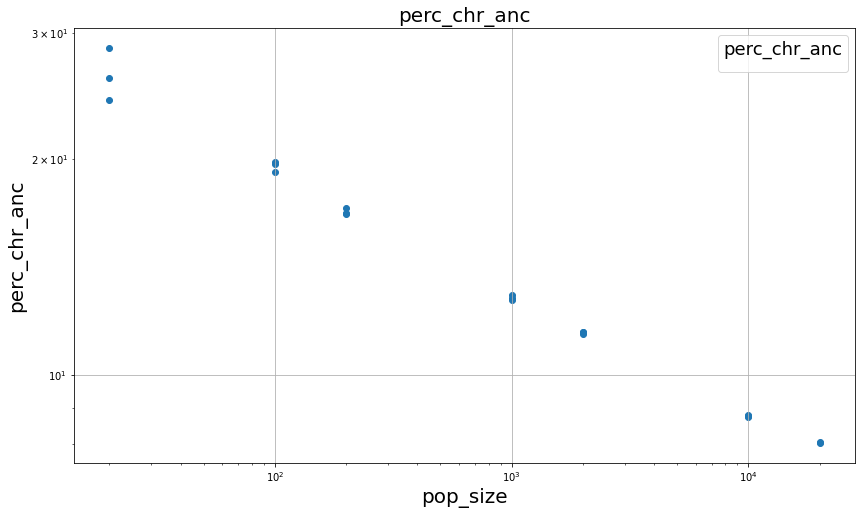

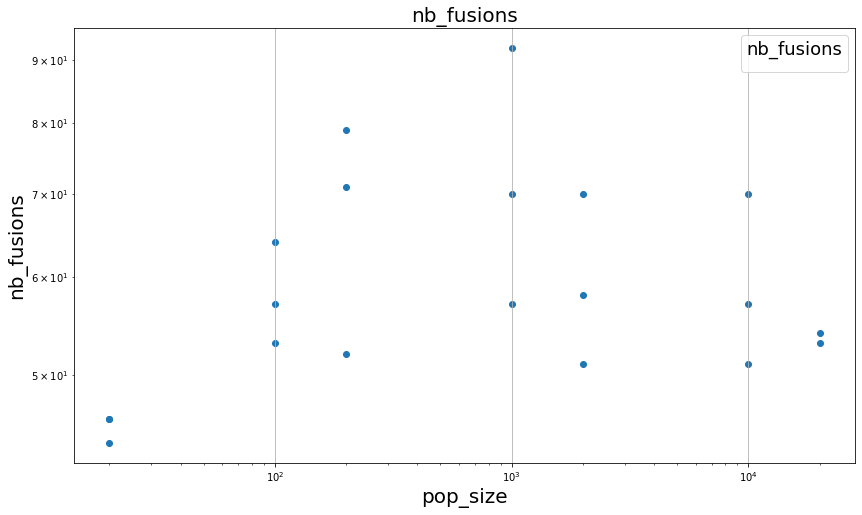

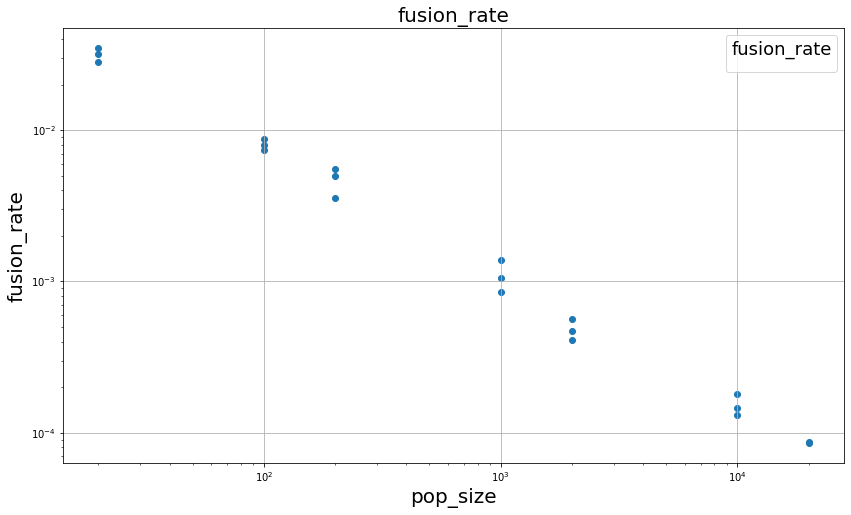

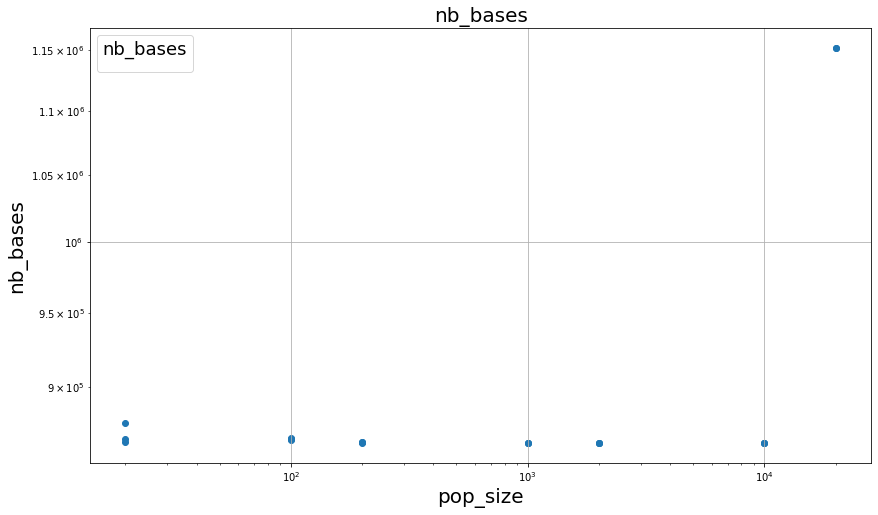

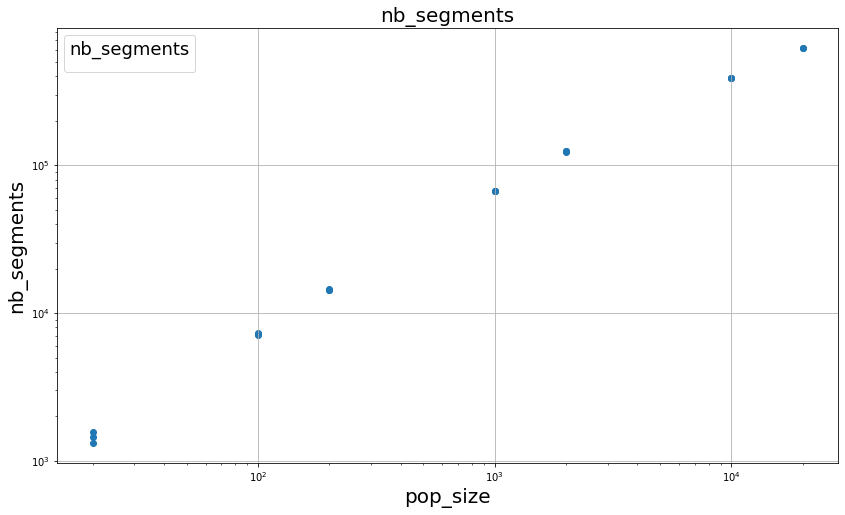

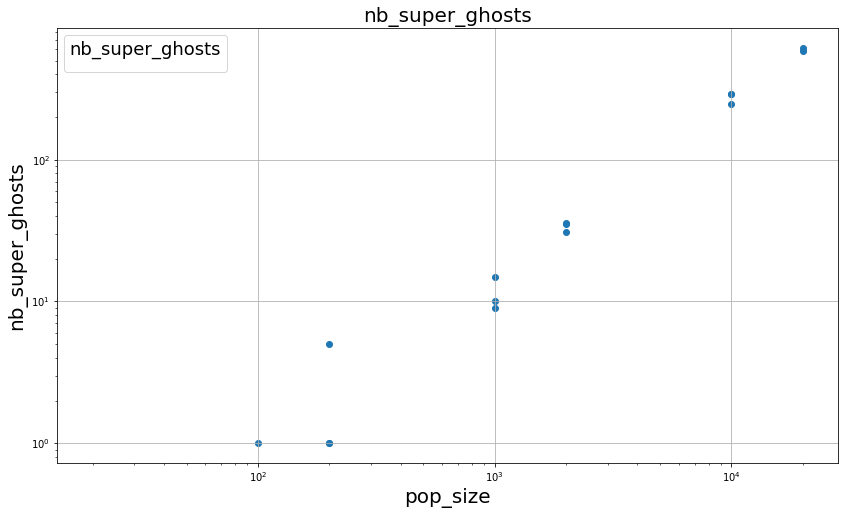

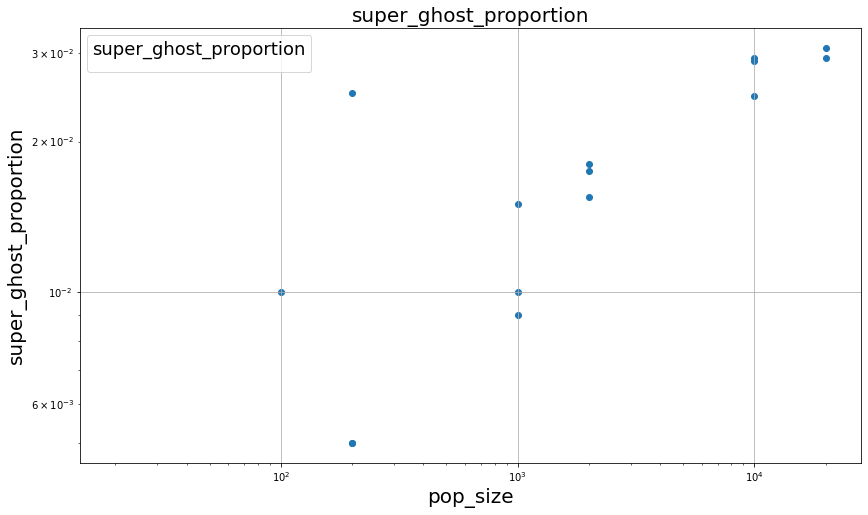

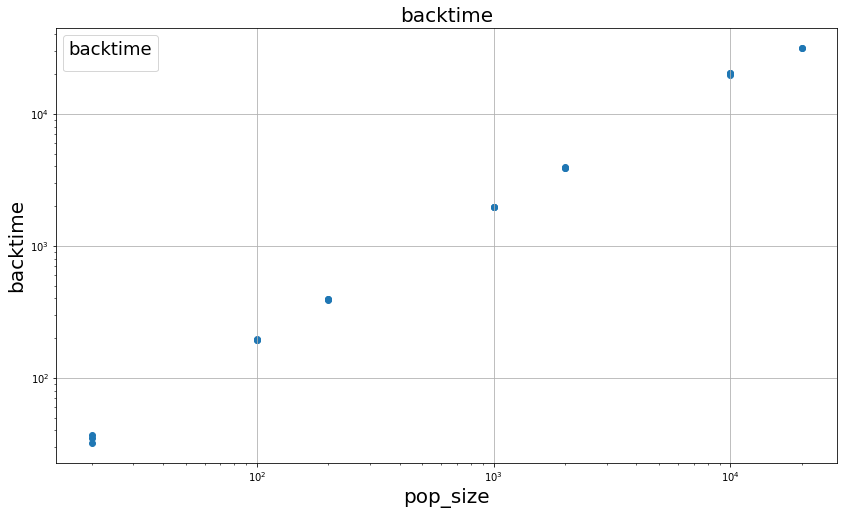

In [33]:
end_values = end_values[end_values["chrlen"]==10000]
end_values["perc_ind_anc"] = end_values["nb_ind_genetic_ancestors"]/end_values["pop_size"]
end_values["perc_chr_anc"] = end_values["nb_chr_genetic_ancestors"]/end_values["pop_size"]

for prop in ["seg_len", "nb_ind_genealogical_ancestors", "perc_ind_anc","perc_chr_anc",
            "nb_fusions", "fusion_rate", "nb_bases","nb_segments","nb_super_ghosts","super_ghost_proportion"
            ,"backtime"]:
     
    fig, ax = plt.subplots(figsize=(14,8))
    ax.scatter(end_values['pop_size'],
           end_values[prop])
           
    plt.legend(title=prop, fontsize=14, title_fontsize=18)
    plt.xlabel("pop_size", fontsize=20)
    plt.ylabel(prop, fontsize=20)
    plt.title(prop, fontsize=20)
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
    

# End values genome structure

In [46]:
eq = pd.read_csv("nbchr.csv", sep=';')
eq['super_ghost_proportion'] = eq['nb_super_ghosts']/eq['pop_size']
eq['fusion_rate'] = eq['nb_fusions']/eq['nb_segments']
eq['seg_len'] = eq['nb_bases']/eq['nb_segments']
end_values = pd.DataFrame()
eq['comb_prop'] = eq["nbchr"]+eq["recomb_rate"]
eq.sort_values(by='comb_prop', inplace=True)
eq['comb_prop'] = eq['comb_prop'].astype(str)
eq['chr_anc_density'] = eq['nb_chr_genetic_ancestors']/(2*eq['nbchr']*eq['pop_size'])
eq = eq[eq['pop_size']==10000]
for clen in eq['chrlen'].unique():
    for p in eq['pop_size'].unique():
        for s in eq['seed'].unique():
            for n in eq['nbchr'].unique():
                tmp = eq[(eq['chrlen']==clen) & (eq['pop_size']==p)
                        & (eq['seed']==s) & (eq['nbchr']==n)]
                if not tmp.empty:
                    max_gen = max(tmp['backtime'])
                    tmp  = tmp[tmp['backtime']==max_gen]
                    end_values = pd.concat([end_values,tmp])
                
end_values

Unnamed: 0  backtime  nb_ind_genealogical_ancestors  \
123127       19845     19845                           7907   
102883       20578     20578                           8001   
41163        20600     20600                           7984   
204079       19825     19825                           7893   
81720        20597     20597                           7954   
245294       20622     20622                           7954   

        nb_ind_genetic_ancestors  nb_chr_genetic_ancestors  nb_segments  \
123127                      7199                     12824       150716   
102883                      6653                     10932       108636   
41163                       6552                     10743       108575   
204079                      7281                     39374       150434   
81720                       6708                     24345       108816   
245294                      6678                     24393       108836   

        nb_fusions  nb_bases  nb_super_ghosts  nbchr  ...  nb_gen  pop_size  \
123127          22    240000              708      1  ...       0     10000   
102883          13    240004             1348      1  ...       0     10000   
41163           13    240004             1432      1  ...       0     10000   
204079          22    240005              612     10  ...       0     10000   
81720           23    240002             1246     10  ...       0     10000   
245294           9    240004             1276     10  ...       0     10000   

        recomb_rate     seed  exact_ghosts  super_ghost_proportion  \
123127       0.0002  1389743             0                  0.0708   
102883       0.0001   987321             0                  0.1348   
41163        0.0001  4334892             0                  0.1432   
204079       0.0002  1389743             0                  0.0612   
81720        0.0001   987321             0                  0.1246   
245294       0.0001  4334892             0                  0.1276   

        fusion_rate   seg_len  comb_prop chr_anc_density  
123127     0.000146  1.592399     1.0002        0.641200  
102883     0.000120  2.209249     1.0001        0.546600  
41163      0.000120  2.210490     1.0001        0.537150  
204079     0.000146  1.595417    10.0002        0.196870  
81720      0.000211  2.205576    10.0001        0.121725  
245294     0.000083  2.205189    10.0001        0.121965  

[6 rows x 21 columns]

/tmp/ipykernel_622339/1035657037.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=prop, fontsize=14, title_fontsize=18)


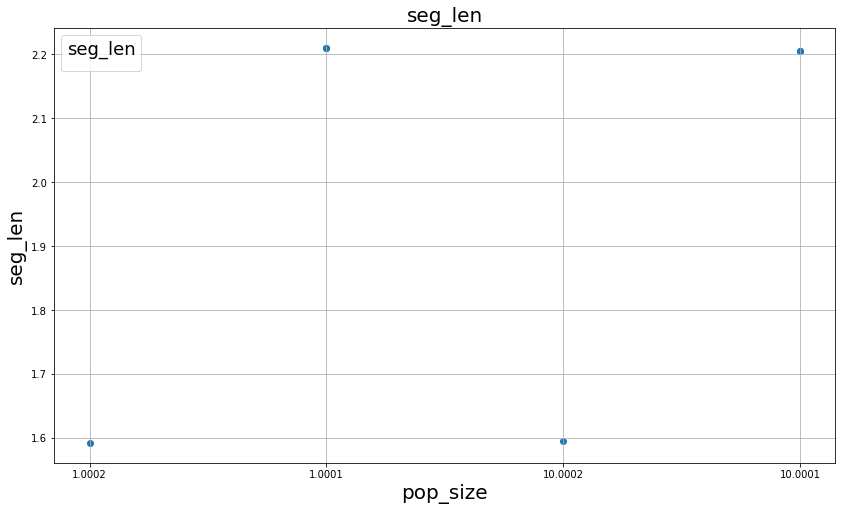

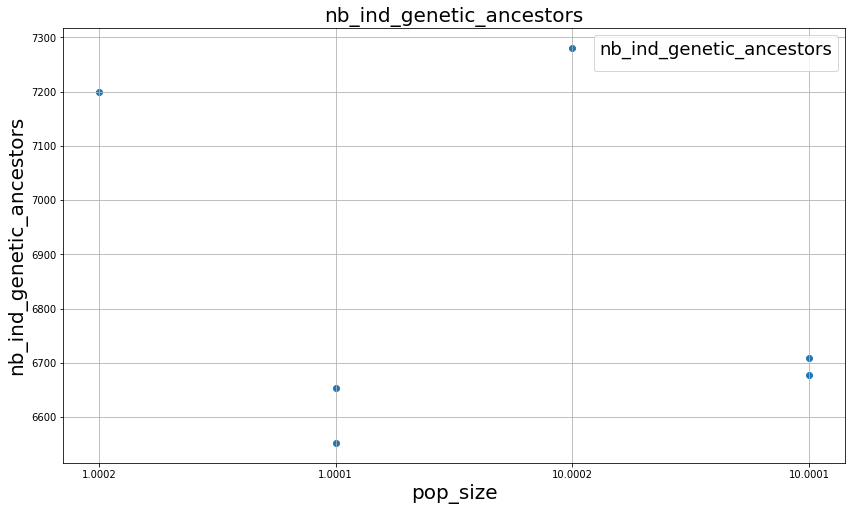

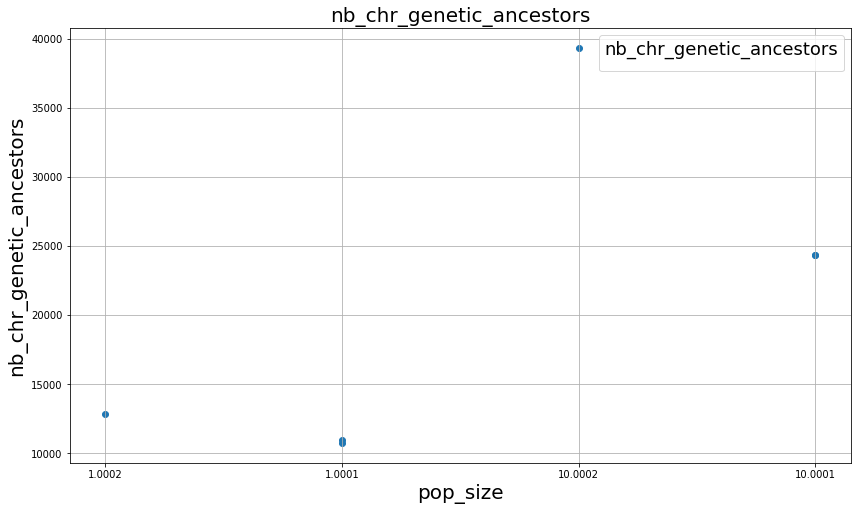

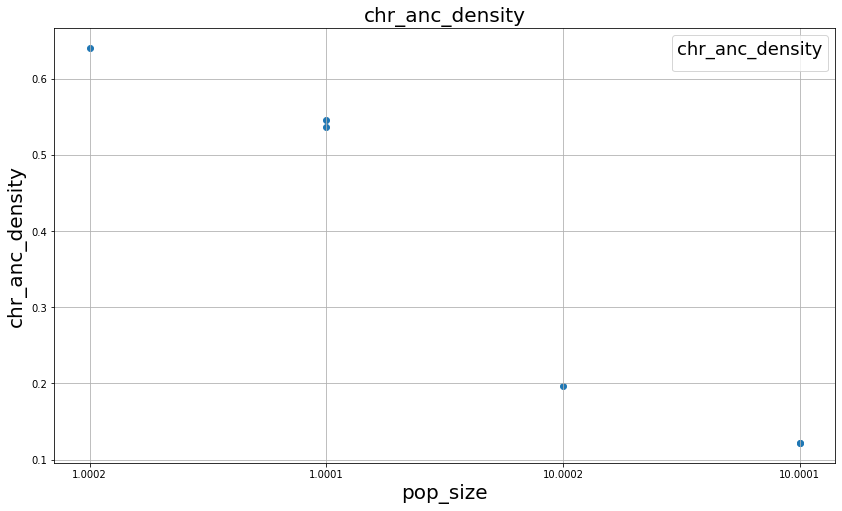

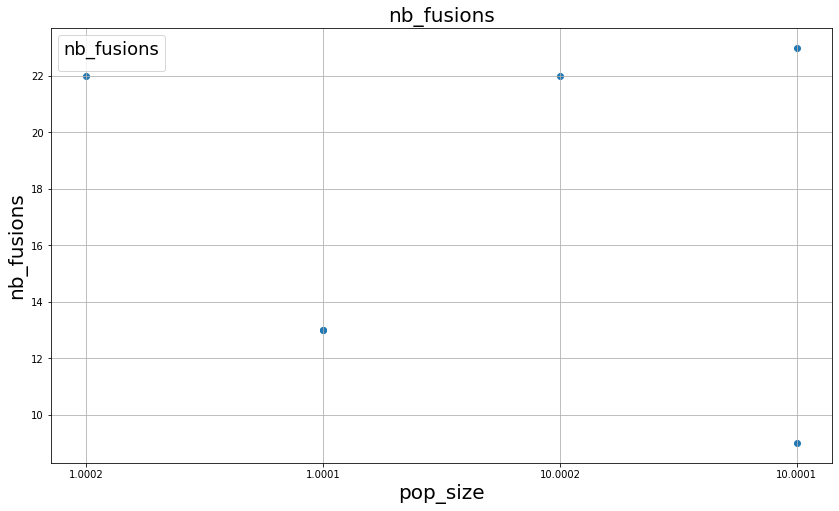

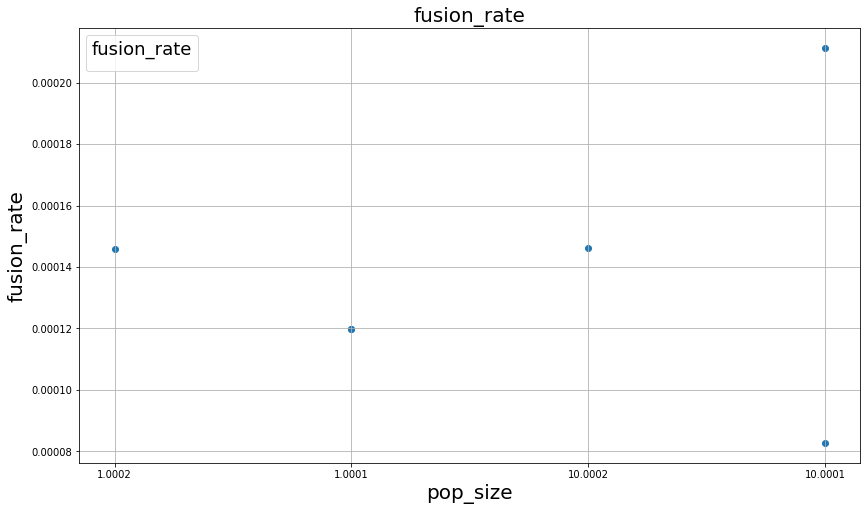

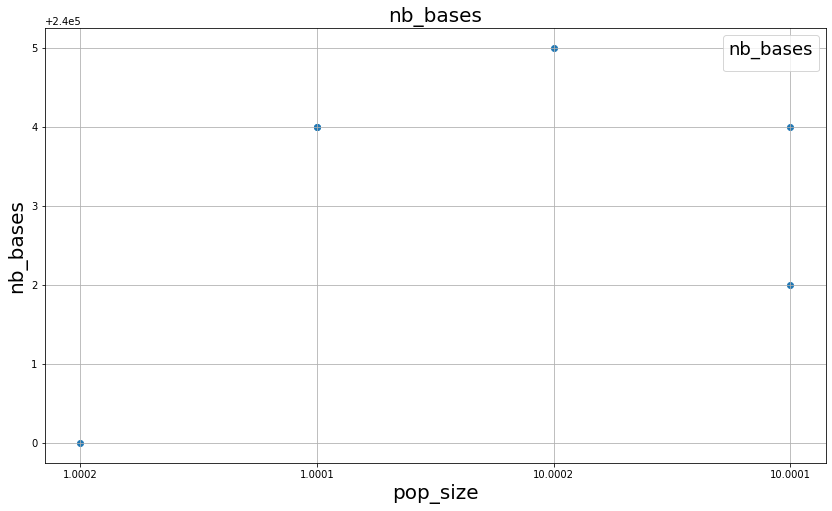

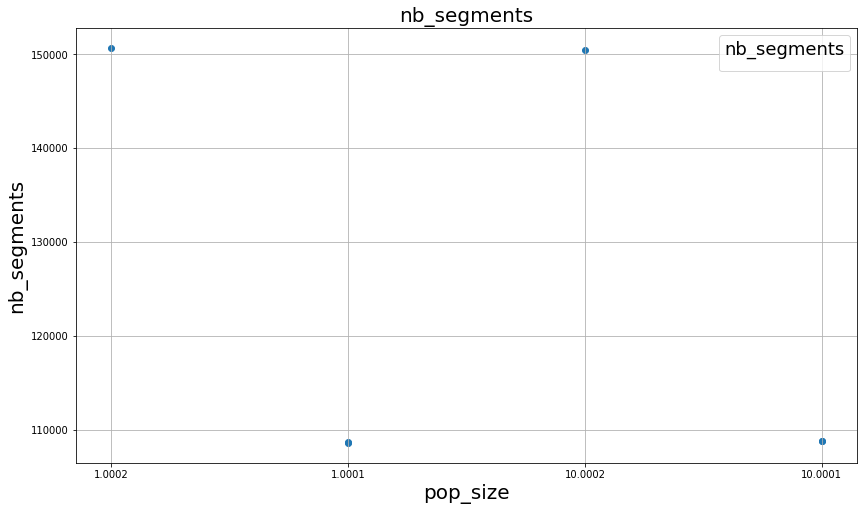

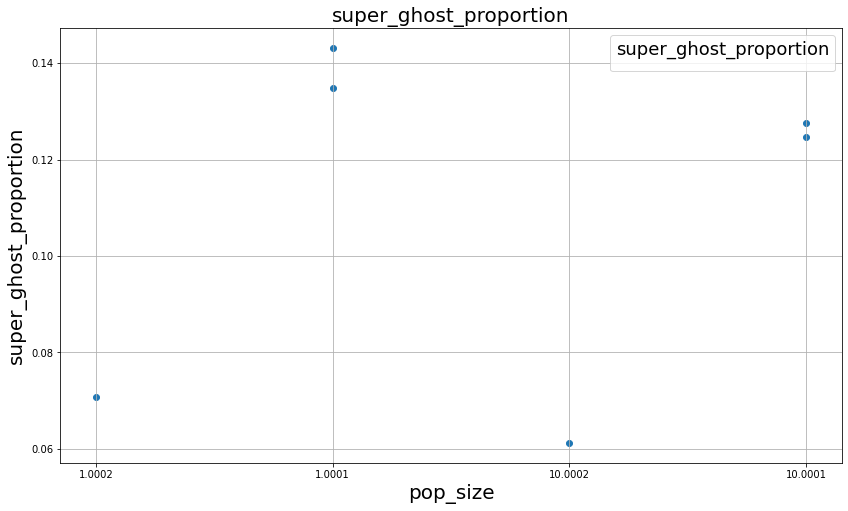

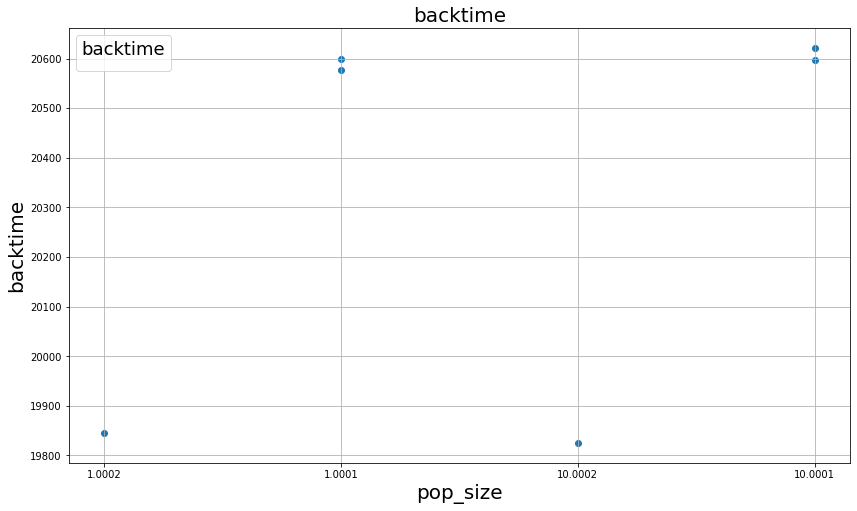

In [47]:
for prop in ["seg_len", "nb_ind_genetic_ancestors","nb_chr_genetic_ancestors", "chr_anc_density",
            "nb_fusions", "fusion_rate", "nb_bases","nb_segments","super_ghost_proportion"
            ,"backtime"]:
     
    fig, ax = plt.subplots(figsize=(14,8))
    ax.scatter(end_values['comb_prop'],
           end_values[prop])
           
    plt.legend(title=prop, fontsize=14, title_fontsize=18)
    plt.xlabel("pop_size", fontsize=20)
    plt.ylabel(prop, fontsize=20)
    plt.title(prop, fontsize=20)
    plt.grid()
    #plt.yscale('log')
    plt.show()
    

# Test math hypothesis

In [90]:
from math import sqrt
from decimal import *
getcontext().prec=40

def nb_s(L,N):
    L=Decimal(float(L))
    N=Decimal(float(N))
    top = Decimal(sqrt(L**Decimal(2)*N*(N+Decimal(2)) - Decimal(4)*L*N + Decimal(1)))
    top += L*N + L - Decimal(1)
    bot = L + Decimal(2)*N - Decimal(2)
    return float(top/bot)

In [92]:
eq = pd.read_csv("lengths.csv", sep=';')
eq['super_ghost_proportion'] = eq['nb_super_ghosts']/eq['pop_size']
eq['fusion_rate'] = eq['nb_fusions']/eq['nb_segments']
eq['seg_len'] = eq['nb_bases']/eq['nb_segments']
end_values = pd.DataFrame()
for clen in eq['chrlen'].unique():
    for p in eq['pop_size'].unique():
        for s in eq['seed'].unique():
            for n in eq['nbchr'].unique():
                tmp = eq[(eq['chrlen']==clen) & (eq['pop_size']==p)
                        & (eq['seed']==s) & (eq['nbchr']==n)]
                if not tmp.empty:
                    max_gen = max(tmp['backtime'])
                    tmp  = tmp[tmp['backtime']==max_gen]
                    tmp["natural"]=True
                    end_values = pd.concat([end_values,tmp])
                    tmp2 = tmp.copy(deep=True)
                    tmp2["nb_segments"] = nb_s(36*clen,p)
                    tmp2["natural"]=False
                    end_values = pd.concat([end_values,tmp2])
end_values

Unnamed: 0  backtime  nb_ind_genealogical_ancestors  \
20572        20572     20572                           7958   
20572        20572     20572                           7958   
319321       19819     19819                           8007   
319321       19819     19819                           8007   
279708       20586     20586                           7999   
...            ...       ...                            ...   
364387       20568     20568                           7949   
299501       19792     19792                           7899   
299501       19792     19792                           7899   
343818       20582     20582                           7992   
343818       20582     20582                           7992   

        nb_ind_genetic_ancestors  nb_chr_genetic_ancestors    nb_segments  \
20572                       7733                     93711  606016.000000   
20572                       7733                     93711   19782.219490   
319321                      7746                     93501  614499.000000   
319321                      7746                     93501   19782.219490   
279708                      7767                     93893  605733.000000   
...                          ...                       ...            ...   
364387                      7679                     94085   19891.502652   
299501                      7659                     94447  659930.000000   
299501                      7659                     94447   19891.502652   
343818                      7741                     94366  649274.000000   
343818                      7741                     94366   19891.502652   

        nb_fusions  nb_bases  nb_super_ghosts  nbchr  chrlen  nb_gen  \
20572           62   4320006              225     36   50000       0   
20572           62   4320006              225     36   50000       0   
319321          66   4320110              261     36   50000       0   
319321          66   4320110              261     36   50000       0   
279708          82   4320045              232     36   50000       0   
...            ...       ...              ...    ...     ...     ...   
364387         109   8640245              270     36  100000       0   
299501          96   8640091              240     36  100000       0   
299501          96   8640091              240     36  100000       0   
343818          91   8640157              251     36  100000       0   
343818          91   8640157              251     36  100000       0   

        pop_size  recomb_rate     seed  exact_ghosts  super_ghost_proportion  \
20572      10000      0.00002   987321             0                  0.0225   
20572      10000      0.00002   987321             0                  0.0225   
319321     10000      0.00002  1389743             0                  0.0261   
319321     10000      0.00002  1389743             0                  0.0261   
279708     10000      0.00002  4334892             0                  0.0232   
...          ...          ...      ...           ...                     ...   
364387     10000      0.00001   987321             0                  0.0270   
299501     10000      0.00001  1389743             0                  0.0240   
299501     10000      0.00001  1389743             0                  0.0240   
343818     10000      0.00001  4334892             0                  0.0251   
343818     10000      0.00001  4334892             0                  0.0251   

        fusion_rate    seg_len  natural  
20572      0.000102   7.128535     True  
20572      0.000102   7.128535    False  
319321     0.000107   7.030296     True  
319321     0.000107   7.030296    False  
279708     0.000135   7.131929     True  
...             ...        ...      ...  
364387     0.000168  13.296142    False  
299501     0.000145  13.092436     True  
299501     0.000145  13.092436    False  
343818     0.000140  13.307413     True  
343818     0.000140  13.307413    Fals

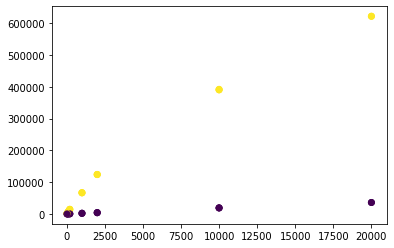

In [93]:
plt.scatter(end_values[end_values["chrlen"]==10000]["pop_size"],
            end_values[end_values["chrlen"]==10000]["nb_segments"],
           c=end_values[end_values["chrlen"]==10000]["natural"])



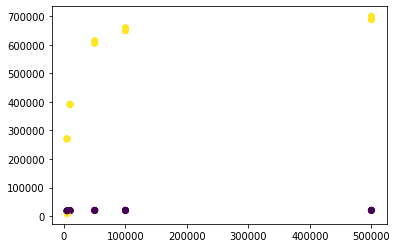

In [94]:
plt.scatter(end_values[end_values["pop_size"]==10000]["chrlen"],
            end_values[end_values["pop_size"]==10000]["nb_segments"],
           c=end_values[end_values["pop_size"]==10000]["natural"])
